# Анализ базы вакансий HeadHunter для Аналитиков данных и Бизнес-аналитиков

## Оглавление: <a class="anchor" id="0"></a>
* [Описание и цели проекта](#1)
* [Открытие файлов с данными](#2)
-- [Загрузка и открытие таблиц](#2.1)
-- [Вывод первых строк таблиц](#2.2)
-- [Описание данных](#2.3)
* [Предобработка и исследовательский анализ данных](#3)
-- [Удаление столбцов](#3.1)
-- [Общая информация о данных](#3.2)
-- [Значения опыта работы](#3.3)
-- [Работа с пропущенными значениями](#3.4)
-- [ЗП в зависимости от опыта](#3.5)
-- [Обработка ключевых навыков](#3.6)
-- [Основные hard и soft навыки](#3.7)
-- [Распределение вакансий по опыту работы](#3.8)
-- [Распределение вакансий по территориальному расположению](#3.9)
* [Определение наиболее желаемых кандидатов на вакансии ДА и БА](#5)
-- [Топ навыки БА](#5.1)
-- [Топ навыки ДА](#5.2)
* [Определение типичного места работы](#4)
-- [Общая функция для вывода графиков](#4.1)
-- [Вакансии БА](#4.2)
-- [Вакансии ДА](#4.3)
* [Динамика количества вакансий](#6)
-- [Функция построения графика динамики](#6.1)
-- [Динамика для БА](#6.2)
-- [Динамика для ДА](#6.3)
* [Общие итоговые выводы (отчет)](#7)
-- [Ссылка на презентацию](#7.1)

## Описание и цели проекта <a class="anchor" id="1"></a>

В моем распоряжении данные, полученные из API HeadHunter'а:  
две таблицы с вакансиями для Аналитиков данных (далее - ДА) и Бизнес-аналитиков (далее - БА).

Цель проекта: выявить различия в предлагаемых вакансиях для ДА и БА.

Мои задачи:
* подготовить описание “идеальных кандидатов” на должности ДА и БА для различных грейдов; 
* определить типичное место работы для ДА и БА;
* сделать расчет помесячной динамики количества вакансий для ДА и БА для различных грейдов.


[Вернуться к оглавлению](#0)

## Открытие файлов с данными <a class="anchor" id="2"></a>

### Загрузка и открытие таблиц <a class="anchor" id="2.1"></a>

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# подгружаем данные

ba, da = (
    pd.read_excel('E:/pets/master/ba.xlsx'), # вакансии БА
    pd.read_excel('E:/pets/master/da.xlsx') # вакансии ДА
)

# Устанавливаем максимальное количество выводимых на экран столбцов
pd.options.display.max_columns=40
pd.set_option('display.float_format', '{:,.2f}'.format)

[Вернуться к оглавлению](#0)

### Вывод первых строк таблиц <a class="anchor" id="2.2"></a>

In [3]:
print('Вакансии ДА')
da.head()

Вакансии ДА


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,https://hh.ru/vacancy/50293361,Открытая,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Power Pivot', 'Прогнозирование', '...",Полный день,Полная занятость,для решение разнообразных и интересных задач в...,решение разнообразный интересный задача команд...,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,https://hh.ru/vacancy/79046568,Открытая,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Яндекс.Директ', 'Маркетинговый анализ', 'Кон...",Полный день,Полная занятость,крупная мебельная компания в поиске web-аналит...,крупный мебельный компания поиск web аналитик ...,"120,000.00","200,000.00",От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,https://hh.ru/vacancy/79115520,Открытая,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),[],Полный день,Полная занятость,команда сеть продаж сбера ищет руководителя на...,команда сеть продажа сбер искать руководитель ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,https://hh.ru/vacancy/79598893,Открытая,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),"['SQL', 'Управленческая отчетность', 'OLAP', '...",Полный день,Полная занятость,wildberries — это крупнейшая в странах еаэс ме...,wildberries крупный страна еаэс международный ...,NaN,NaN,ЗП не указана,"SQL, Управленческая отчетность, SQL запросы, E...",NaN,NaN
4,80616218,Data Analyst,2023-12-03 14:43:59,https://hh.ru/vacancy/80616218,Открытая,Контакт,NaN,Санкт-Петербург,Junior+ (1-3 years),"['SQL', 'confluence', 'Документация', 'Jira', ...",Полный день,Полная занятость,мы строим современную и технологичную финтех-к...,строить современный технологичный финтех компа...,NaN,NaN,ЗП не указана,"Power BI, SQL, Jira, Confluence",confluence,Документация


In [4]:
print('Вакансии БА')
ba.head()

Вакансии БА


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,на основе конкурсного отбора обязанности учас...,основа конкурсный отбор обязанность участие ко...,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,"привет, будущий коллега!мы приглашаем проектны...",привет будущий коллега приглашать проектный ан...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,digital design более четверти века разрабатыва...,digital design четверть век разрабатывать внед...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,https://hh.ru/vacancy/67345392,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",Полный день,Полная занятость,солво – лидер российского рынка it решений для...,солво лидер российский рынок it решение автома...,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,https://hh.ru/vacancy/67498251,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",Удаленная работа,Полная занятость,"обязанности: анализ бизнес-процессов; сбор, а...",обязанность анализ бизнес процесс сбор анализ ...,"200,000.00",NaN,ЗП не указана,Бизнес-анализ,NaN,Документация


[Вернуться к оглавлению](#0)

### Описание данных <a class="anchor" id="2.3"></a>

Таблицы **da** и **ba** содержат информацию о вакансиях для ДА и БА.  
* **id** — уникальный номер вакансии;
* **name** — название вакансии;
* **published_at** — дата размещения вакансии;
* **alternate_url** — url-ссылка на вакансию;
* **type** — тип вакансии (открытая/закрытая);
* **employer** — наниматель;
* **department** — подразделение нанимателя;
* **area** — расположение офиса нанимателя;
* **experience** — требуемый опыт работы;
* **key_skills** — ключевые навыки;
* **schedule** — график работы;
* **employment** — тип занятости;
* **description** и **description_lemmatized** — описание вакансии;
* **salary_from** — зарплата "от";
* **salary_to** — зарплата "до;
* **salary_bin** — зарплатная вилка;
* **key_skills_from_key_skills_field** — ключевые навыки из поля "key_skills" и описания вакансии;
* **hard_skills_from_description** — хардскиллы из описания вакансии;
* **soft_skills_from_description** — софтскиллы из описания вакансии. 

[Вернуться к оглавлению](#0)

## Предобработка и исследовательский анализ данных <a class="anchor" id="3"></a>

### Удаление столбцов <a class="anchor" id="3.1"></a>

Ссылки на вакансии нам не пригодятся, тип вакансии тоже, т.к. выгружались только открытые вакансии.  
Столбец с ключевыми навыками мы удаляем, т.к. при выгрузке значения этого поля перетекли в поле "key_skills_from_key_skills_field" вместе с ключевыми навыками, найденными в описании вакансии.  
Столбцы с описанием вакансий мы, соответственно, тоже удаляем, они были задйествованы при создании столбцов "key_skills_from_key_skills_field", "hard_skills_from_description", "soft_skills_from_description".

Однако, на всякий случай, все равно оставим исходные таблицы, а работать будем с копиями.

In [5]:
da_df = da.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized']) 
ba_df = ba.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized']) 

[Вернуться к оглавлению](#0)

### Общая информация о данных <a class="anchor" id="3.2"></a>

Далее рассмотрим общую информацию о данных с помощью заранее подготовленной функции, которую я использую почти во всех своих проектах.   
Она выводит на экран первые строки датасета, сводную информацию о таблице, долю пропусков в каждом столбце, считает количество дубликатов, дает описание столбцам с количественными значениями, приводит названия колонок в удобный для работы вид, столбцы с датами приводит в соответствующий формат, в столбцах с категориальными данными показывает количество повторяющихся значений.  

In [6]:
def inspect(df):
    display(df.head())
    print(50*'*')
    df.info()
    print(50*'*')
    print('Доля пропусков')
    display(df.isna().mean().round(3)*100)
    print(50*'*')
    print ('Количество дубликатов -', df.duplicated().sum())
    print(50*'*')
    numeric_columns=df.describe().columns
    display(df.describe())
    print(50*'*')
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name or 'at' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df

**Сначала рассмотрим датасет с вакансиями ДА.** 

In [7]:
da_df = inspect(da_df)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),Полный день,Полная занятость,"120,000.00","200,000.00",От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"SQL, Управленческая отчетность, SQL запросы, E...",NaN,NaN
4,80616218,Data Analyst,2023-12-03 14:43:59,Контакт,NaN,Санкт-Петербург,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Power BI, SQL, Jira, Confluence",confluence,Документация


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                786 non-null    int64         
 1   name                              786 non-null    object        
 2   published_at                      786 non-null    datetime64[ns]
 3   employer                          786 non-null    object        
 4   department                        188 non-null    object        
 5   area                              786 non-null    object        
 6   experience                        786 non-null    object        
 7   schedule                          786 non-null    object        
 8   employment                        786 non-null    object        
 9   salary_from                       69 non-null     float64       
 10 

id                                  0.00
name                                0.00
published_at                        0.00
employer                            0.00
department                         76.10
area                                0.00
experience                          0.00
schedule                            0.00
employment                          0.00
salary_from                        91.20
salary_to                          89.10
salary_bin                          0.00
key_skills_from_key_skills_field   33.60
hard_skills_from_description       64.20
soft_skills_from_description       68.40
dtype: float64

**************************************************
Количество дубликатов - 0
**************************************************


,id,salary_from,salary_to
count,786.00,69.00,86.00
mean,"89,334,666.71","167,361.59","242,533.72"
std,"2,441,171.63","78,265.81","125,657.47"
min,"50,293,361.00","20,000.00","40,000.00"
25%,"88,117,363.75","100,000.00","123,662.50"
50%,"89,461,517.00","180,000.00","245,000.00"
75%,"90,801,516.25","233,750.00","327,250.00"
max,"92,418,848.00","398,000.00","561,000.00"


**************************************************


Data Analyst                                                131
Data analyst                                                 37
Senior Data Analyst                                          34
Senior Data Analyst (User Acquisition)                       18
Дата аналитик                                                15
                                                           ... 
Аналитик данных / Data Analyst (BI Analyst/BI Developer)      1
Data Analyst / Data Scientist (Junior/Junior+)                1
BI-инженер/Senior Data analyst (Tableau)                      1
Data Analyst/Scientist                                        1
Аналитик данных I data analyst (удаленно по РФ)               1
Name: name, Length: 344, dtype: int64

**************************************************


СБЕР                                               101
WILDBERRIES                                         36
МТС                                                 32
Playrix                                             21
КАЗАНЬЭКСПРЕСС                                      10
                                                  ... 
Innovative People                                    1
Карпов Курсес                                        1
Публичная Компания «Freedom Finance Global PLC»      1
Логиклайк                                            1
Банк Санкт-Петербург                                 1
Name: employer, Length: 295, dtype: int64

**************************************************


Сбер для экспертов                              70
«МТС», Digital                                  27
Сбер. IT                                        17
Сбер. Data Science                              14
билайн: ИТ, Data, Digital                        7
Леруа Мерлен. Центральный офис                   5
Газпромбанк                                      4
ПАО «Промсвязьбанк», Бизнес и инфраструктура     4
Росбанк: Аналитика                               4
Ozon Fintech                                     3
 Альфа-Банк                                      3
«МТС»                                            3
Компания «СПОРТМАСТЕР», Sportmaster Lab          3
Росбанк: Data                                    2
«РОСБАНК»                                        2
VK, Бизнес юнит технологий ИИ                    2
«МТС», Стажировки                                1
«Роза Хутор» IT                                  1
БКС IT & Digital                                 1
VK, ВКонтакте                  

**************************************************


Москва                          514
Санкт-Петербург                  98
Минск                            31
Алматы                           22
Екатеринбург                     16
Тбилиси                          14
Ташкент                          13
Казань                           10
Сербия                            9
Новосибирск                       9
Краснодар                         6
Армения                           5
Кипр                              4
Тюмень                            4
Ростов-на-Дону                    4
Астана                            3
Владивосток                       3
Иваново (Ивановская область)      2
Батуми                            2
Нижний Новгород                   2
Черногория                        2
Ижевск                            1
Томск                             1
Атырау                            1
Красноярск                        1
Баку                              1
Иннополис                         1
Рязань                      

**************************************************


Junior+ (1-3 years)      387
Middle (3-6 years)       355
Junior (no experince)     25
Senior (6+ years)         19
Name: experience, dtype: int64

**************************************************


Полный день         598
Удаленная работа    161
Гибкий график        26
Сменный график        1
Name: schedule, dtype: int64

**************************************************


Полная занятость       777
Частичная занятость      5
Стажировка               2
Проектная работа         2
Name: employment, dtype: int64

**************************************************


ЗП не указана                700
Больше 300 тысяч              28
От 200 тысяч до 300 тысяч     28
От 100 тысяч до 200 тысяч     21
Меньше 100 тысяч               9
Name: salary_bin, dtype: int64

**************************************************


Product Analytics, Python, SQL, Data Analysis, Big Data                                                                                                                                                                            15
SQL, Python                                                                                                                                                                                                                        13
Python, SQL, A/B тесты                                                                                                                                                                                                              9
Python, SQL                                                                                                                                                                                                                         9
SQL                                                                             

**************************************************


Pandas                        175
confluence                     44
Юнит-экономика                 43
Pandas, confluence             11
Google Sheets                   2
confluence, Юнит-экономика      2
Pandas, Google Sheets           2
Pandas, Юнит-экономика          2
Name: hard_skills_from_description, dtype: int64

**************************************************


Документация                                                                                                                        71
Коммуникация                                                                                                                        46
Аналитическое мышление                                                                                                              38
Коммуникация, Документация                                                                                                          21
Проактивность                                                                                                                       13
Креативность                                                                                                                         5
Документация, Аналитическое мышление                                                                                                 5
Коммуникация, Документация, Аналитическое мышление     

**************************************************


Всего вакансий для ДА в датасете 786.  
Дубликаты отсутствуют.  
Больше всего пропусков в зарплатных столбцах.  
Типы данных в столбцах установлены корректно.    
В столбцах с зарплатой  предварительно аномалий не наблюдается.  
Больше всего вакансий предлагает СБЕР.  
Огромное количество вакансий предложено в Москве.  
Больше всего требуются Junior+ и Middle специалисты.  
Предпочтительным графиком работы в большинстве вакансий является «полный день».  
Почти все вакансии размещены на полную занятость.  
Зарплата не указана в 700 вакансиях.  
Столбцы с навыками требуют отдельного рассмотрения и проработки.

**Теперь тоже самое проделаем с датасетом вакансий БА.**

In [8]:
ba_df = inspect(ba_df)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,NaN,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Digital Design,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),Удаленная работа,Полная занятость,"200,000.00",NaN,ЗП не указана,Бизнес-анализ,NaN,Документация


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4171 non-null   int64         
 1   name                              4171 non-null   object        
 2   published_at                      4171 non-null   datetime64[ns]
 3   employer                          4171 non-null   object        
 4   department                        651 non-null    object        
 5   area                              4171 non-null   object        
 6   experience                        4171 non-null   object        
 7   schedule                          4171 non-null   object        
 8   employment                        4171 non-null   object        
 9   salary_from                       927 non-null    float64       
 1

id                                  0.00
name                                0.00
published_at                        0.00
employer                            0.00
department                         84.40
area                                0.00
experience                          0.00
schedule                            0.00
employment                          0.00
salary_from                        77.80
salary_to                          84.80
salary_bin                          0.00
key_skills_from_key_skills_field   36.60
hard_skills_from_description       84.50
soft_skills_from_description       37.60
dtype: float64

**************************************************
Количество дубликатов - 0
**************************************************


,id,salary_from,salary_to
count,"4,171.00",927.00,633.00
mean,"89,692,423.72","109,891.57","152,817.91"
std,"2,558,833.87","62,102.03","78,582.25"
min,"49,470,036.00",60.00,"30,000.00"
25%,"88,880,149.00","69,825.00","90,000.00"
50%,"90,031,468.00","95,000.00","140,000.00"
75%,"91,322,815.00","150,000.00","200,000.00"
max,"92,419,423.00","350,000.00","467,500.00"


**************************************************


Бизнес-аналитик                                                       1349
Ведущий бизнес-аналитик                                                123
Бизнес-аналитик 1С                                                     103
Business Analyst                                                        58
Младший бизнес-аналитик                                                 47
                                                                      ... 
Бизнес-аналитик в торгово-производственную компанию (маркетплейсы)       1
Главный бизнес-аналитик IT                                               1
Бизнес-аналитик 1C ERP                                                   1
Бизнес-аналитик (оптимизация бизнес-процессов)                           1
Проектный менеджер/Бизнес-аналитик департамента маркетинга               1
Name: name, Length: 1550, dtype: int64

**************************************************


Банк ВТБ (ПАО)               88
Aston                        66
СБЕР                         58
МАГНИТ, Розничная сеть       56
Комус                        38
                             ..
Navicon                       1
Хорева Ольга Владимировна     1
Департамент Ф53               1
ТолкФинанс                    1
Паритет                       1
Name: employer, Length: 1712, dtype: int64

**************************************************


Сбер для экспертов                              43
ПАО ВТБ, Средний и малый бизнес                 37
ПАО ВТБ, Розничный бизнес                       29
ПАО «Промсвязьбанк», Бизнес и инфраструктура    23
Сибур                                           23
                                                ..
ДИКСИ. IT                                        1
ПАО «Газпром нефть» Закупки                      1
Первая Грузовая Компания, IT/Digital             1
ТМХ Инжиниринг                                   1
 ITMS Finance                                    1
Name: department, Length: 143, dtype: int64

**************************************************


Москва              2266
Санкт-Петербург      436
Минск                173
Екатеринбург         135
Казань               116
                    ... 
Павловский Посад       1
Сыктывкар              1
Караганда              1
Королев                1
Старый Оскол           1
Name: area, Length: 125, dtype: int64

**************************************************


Junior+ (1-3 years)      2122
Middle (3-6 years)       1596
Junior (no experince)     364
Senior (6+ years)          89
Name: experience, dtype: int64

**************************************************


Полный день         3335
Удаленная работа     717
Гибкий график        115
Сменный график         4
Name: schedule, dtype: int64

**************************************************


Полная занятость       4024
Стажировка              120
Проектная работа         19
Частичная занятость       8
Name: employment, dtype: int64

**************************************************


ЗП не указана                3538
От 100 тысяч до 200 тысяч     268
Меньше 100 тысяч              173
От 200 тысяч до 300 тысяч     146
Больше 300 тысяч               46
Name: salary_bin, dtype: int64

**************************************************


1С: Бухгалтерия, 1С: Предприятие 8, ERP-системы на базе 1С, Бухгалтерский учет, Аналитик 1С, Бизнес-анализ, 1С: Зарплата и управление персоналом, 1С: Документооборот, Аналитическое мышление, Автоматизация процессов управления персоналом    33
Бизнес-анализ                                                                                                                                                                                                                                   30
UML, SQL, Business Analysis                                                                                                                                                                                                                     23
Бизнес-анализ, Работа в команде, Моделирование бизнес процессов, Функциональные требования                                                                                                                                                      18
ERP-системы на базе 1С      

**************************************************


confluence                       588
Юнит-экономика                    33
Pandas                            14
confluence, Юнит-экономика         9
Pandas, Юнит-экономика             2
Google Sheets                      1
Юнит-экономика, Google Sheets      1
Name: hard_skills_from_description, dtype: int64

**************************************************


Документация                                                                              1300
Коммуникация, Документация                                                                 292
Коммуникация                                                                               254
Аналитическое мышление                                                                     205
Документация, Аналитическое мышление                                                       139
                                                                                          ... 
Документация, Эмпатия, Переговоры                                                            1
Коммуникация, Решение проблем, Презентация результатов, Переговоры, Внимание к деталям       1
Тайм-менеджмент, Документация, Переговоры                                                    1
Тайм-менеджмент, Документация, Аналитическое мышление                                        1
Документация, Креативность, Аналитическое мышление

**************************************************


Вакансий для БА в датасете 4171.  
Дубликаты отсутствуют.    
Больше всего пропусков в зарплатных столбцах и столбце хардскилов.    
Пропуски в столбце "department" на анализ повлиять не должны.  
Типы данных в столбцах установлены корректно.      
Больше всего вакансий предлагает Банк ВТБ, Aston и СБЕР.  
Огромное количество вакансий, как и в случае с ДА, тоже предложено в Москве.  
Больше всего требуются Junior+ и Middle специалисты.  
Предпочтительным графиком работы в большинстве вакансий является «полный день».  
Почти все вакансии размещены на полную занятость.  
Зарплата не указана в 3538 вакансиях.  
Столбцы с навыками требуют отдельного рассмотрения и проработки.

[Вернуться к оглавлению](#0)

### Значения опыта работы <a class="anchor" id="3.3"></a>

Для дальнейшего удобства в анализе я хочу немного сократить значения в столбце experience (убрать скобки) и привести их нижнему регистру.

In [9]:
da_df['experience'] = da_df['experience'].apply(lambda x: x.lower().split(' ')[0])
da_df['experience'].sample(7)

244     middle
537     middle
200     junior
654     middle
785    junior+
31     junior+
337    junior+
Name: experience, dtype: object

In [10]:
ba_df['experience'] = ba_df['experience'].apply(lambda x: x.lower().split(' ')[0])
ba_df['experience'].sample(7)

3379    junior+
921      middle
2098    junior+
2665     middle
1700     middle
788     junior+
3424    junior+
Name: experience, dtype: object

[Вернуться к оглавлению](#0)

### Работа с пропущенными значениями <a class="anchor" id="3.4"></a>

В обеих таблицах имеются пропущенные значения в столбцах:  
department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description.  

Столбцы с хард и софт навыками пока трогать не будем, а остальные для удобства анализа заполним заглушками.

In [11]:
da_df[['salary_from','salary_to']] = da_df[['salary_from','salary_to']].fillna(0)

da_df['department'] = \
da_df['department'].fillna('unknown')

da_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
da_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

In [12]:
ba_df[['salary_from','salary_to']] = ba_df[['salary_from','salary_to']].fillna(0)

ba_df['department'] = \
ba_df['department'].fillna('unknown')

ba_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
ba_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

Теперь посмотрим подробнее на колонки с зарплатами, рассмотрим нулевые значения в них и найдем взаимосвязь между ними.

In [13]:
# Для начала делаю срез, где в salary_bin зарплатная вилка указана, чтобы 
# посмотреть какие значения будут принимать остальные столбцы в таком случае

(da_df[['salary_from','salary_to', 'salary_bin']]
 .query('(salary_bin != "ЗП не указана") & (salary_from != 0) ') # "ЗП от" не равна нулю
 .sample(15)
)

,salary_from,salary_to,salary_bin
178,"100,000.00","120,000.00",От 100 тысяч до 200 тысяч
240,"233,750.00","561,000.00",Больше 300 тысяч
101,"233,750.00","327,250.00",Больше 300 тысяч
666,"233,750.00","327,250.00",Больше 300 тысяч
497,"20,000.00","50,000.00",Меньше 100 тысяч
268,"84,150.00","121,550.00",От 100 тысяч до 200 тысяч
387,"60,000.00","80,000.00",Меньше 100 тысяч
200,"70,000.00","90,000.00",Меньше 100 тысяч
433,"120,000.00","120,000.00",От 100 тысяч до 200 тысяч
149,"180,000.00","250,000.00",От 200 тысяч до 300 тысяч


In [14]:
(da_df[['salary_from','salary_to', 'salary_bin']]
 .query('(salary_bin != "ЗП не указана") & (salary_from == 0) ') # "ЗП от" равна нулю
 .sample(15)
)

,salary_from,salary_to,salary_bin
757,0.00,"150,000.00",От 100 тысяч до 200 тысяч
271,0.00,"200,000.00",От 200 тысяч до 300 тысяч
753,0.00,"100,000.00",От 100 тысяч до 200 тысяч
55,0.00,"250,000.00",От 200 тысяч до 300 тысяч
645,0.00,"200,000.00",От 200 тысяч до 300 тысяч
784,0.00,"55,000.00",Меньше 100 тысяч
767,0.00,"270,000.00",От 200 тысяч до 300 тысяч
425,0.00,"140,250.00",От 100 тысяч до 200 тысяч
380,0.00,"200,000.00",От 200 тысяч до 300 тысяч
676,0.00,"180,000.00",От 100 тысяч до 200 тысяч


Из получившихся результатов я могу сделать вывод, что "salary_bin" отталкивается от сведений, внесенных именно в столбик "salary_to", поэтому я хочу посмотреть какие значения буду принимать столбики при "salary_bin", в которой "ЗП не указана".

In [15]:
(da_df[['salary_from','salary_to', 'salary_bin']]
 .query('(salary_bin == "ЗП не указана") & (salary_from > 0) ')
)

,salary_from,salary_to,salary_bin
5,"300,000.00",0.00,ЗП не указана
35,"90,000.00",0.00,ЗП не указана
44,"280,500.00",0.00,ЗП не указана
77,"40,000.00",0.00,ЗП не указана
103,"398,000.00",0.00,ЗП не указана
144,"160,000.00",0.00,ЗП не указана
188,"70,000.00",0.00,ЗП не указана
205,"80,000.00",0.00,ЗП не указана
228,"180,000.00",0.00,ЗП не указана
290,"180,000.00",0.00,ЗП не указана


Видим, что хоть в "salary_from" и есть значения ЗП, но категория для них все равно определилась, как "ЗП не указана", что подтверждает мой вывод о том, что определяющим является именно "salary_to".  
Чтобы до конца подтвердить это, проверим есть ли значения в "salary_bin", равные "ЗП не указана", но в "salary_to" есть значения больше нуля.

In [16]:
(da_df[['salary_from','salary_to', 'salary_bin']]
 .query('(salary_bin == "ЗП не указана") & (salary_to > 0) ')
)

,salary_from,salary_to,salary_bin


Такие значения отсутствуют.

Делаю вывод, что для анализа стоит заполнить/исправить указанные данные.  
Там, где "salary_from" больше нуля, а "salary_to" равна нулю, заполним "salary_to" значениями из "salary_from", а "salary_bin" исправим соответсвующей категорией.  

Категории будем использовать те, которые нам уже ранее были известны:  
* ЗП не указана               
* Меньше 100 тысяч  
* От 100 тысяч до 200 тысяч  
* От 200 тысяч до 300 тысяч  
* Больше 300 тысяч  

In [17]:
da_df.loc[(da_df['salary_bin'] == "ЗП не указана") & (da_df['salary_from'] > 0) , 'salary_to'] = \
da_df.loc[(da_df['salary_bin'] == "ЗП не указана") & (da_df['salary_from'] > 0) , 'salary_from']

In [18]:
ba_df.loc[(ba_df['salary_bin'] == "ЗП не указана") & (ba_df['salary_from'] > 0) , 'salary_to'] = \
ba_df.loc[(ba_df['salary_bin'] == "ЗП не указана") & (ba_df['salary_from'] > 0) , 'salary_from']

In [19]:
def vilka(salary):
    if 0 < salary < 100000:
        return 'Менее 100 тыс.'
    elif 100000 <= salary < 200000:
        return '100-200 тыс.'
    elif 200000 <= salary < 300000:
        return '200-300 тыс.'
    elif salary >= 300000:
        return 'Более 300 тыс.'
    else:
        return 'ЗП не указана'

In [20]:
da_df['salary_bin'] = da_df['salary_to'].apply(vilka)

In [21]:
da_df.sample(15)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
396,89491613,"Senior Data Analyst, Retail (remote)",2023-11-15 12:29:11,SP,unknown,Санкт-Петербург,senior,Гибкий график,Проектная работа,0.00,0.00,ЗП не указана,"SAP, ERP-системы на базе 1С, Анализ данных",,
639,91304123,Data analyst/Аналитик данных,2024-01-09 14:03:31,Maxim technology,unknown,Казань,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,Pandas,
172,87944900,Game Data Analyst,2023-10-16 10:45:49,ЛОДЖИК ВЭЙ СОЛЮШЕНЗ,unknown,Минск,junior+,Удаленная работа,Частичная занятость,0.00,0.00,ЗП не указана,"Data Analysis, Game Data Analyst",,
56,86719016,Руководитель направления планирования и аналит...,2024-01-08 13:20:20,Деловые Линии,unknown,Москва,senior,Полный день,Полная занятость,0.00,0.00,ЗП не указана,"Работа с базами данных, Управление товарными з...",,
566,90660287,"Data analyst, направление Комплаенс",2023-12-13 18:12:22,СБЕР,Сбер для экспертов,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,Юнит-экономика,
137,87797194,Data Analyst,2024-01-03 17:10:06,Центральный банк Российской Федерации,unknown,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,,
26,85982139,Data Analyst,2023-10-12 15:46:27,"DODO BRANDS (Dodo Pizza, Drinkit, Doner 42)",unknown,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,"Python, SQL, Tableau, Power BI, Английский язык",,Аналитическое мышление
38,86120053,Аналитик данных / Supply Data Analyst,2023-10-25 10:49:47,Марс,unknown,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,,
424,89667235,Аналитик данных / Data Analyst,2024-01-19 19:11:09,Evercode Lab,unknown,Санкт-Петербург,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,"MS Excel, Финансовый анализ, SQL, Работа в ком...",,
360,89273301,Data Analyst,2023-11-09 17:32:50,Wanted,unknown,Москва,middle,Полный день,Полная занятость,0.00,"374,000.00",Более 300 тыс.,,,


In [22]:
ba_df['salary_bin'] = ba_df['salary_to'].apply(vilka)

In [23]:
ba_df.sample(15)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
2604,90647848,Бизнес-аналитик (онлайн-кинотеатр),2024-01-25 11:37:29,Эр-1,unknown,Пермь,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,Юнит-экономика,
3434,91670656,Бизнес-аналитик в сервис Коммерции,2024-01-24 16:49:27,2ГИС,unknown,Новосибирск,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,Бизнес-анализ,,
1083,88946100,Бизнес-аналитик/ Интегратор CRM,2023-11-19 14:41:08,LS.NET.RU,unknown,Нижний Новгород,junior+,Полный день,Полная занятость,"60,000.00","80,000.00",Менее 100 тыс.,"CRM, Sensei CDP, Sensei BPM, Roistat, системы ...",,
4148,92406349,Бизнес-аналитик в ИТ / Системный аналитик,2024-01-30 13:13:01,«DynamicSun LLC»,unknown,Москва,junior+,Удаленная работа,Полная занятость,0.00,0.00,ЗП не указана,"Agile, BPMN, UML, Разработка проектной докумен...",,"Документация, Креативность"
1383,89275282,Бизнес-аналитик,2023-11-18 18:27:18,Брайт Софт,unknown,Пермь,junior+,Удаленная работа,Полная занятость,0.00,0.00,ЗП не указана,"SQL, Аналитическое мышление, Внимательность, Г...",,"Коммуникация, Документация"
677,88440247,Бизнес-аналитик (стажер),2024-01-30 11:34:30,Интем Лаб,unknown,Чебоксары,junior,Гибкий график,Стажировка,"20,000.00","30,000.00",Менее 100 тыс.,"SQL, Моделирование процессов, TMS Systems, EPC...",,
405,87528353,Ведущий бизнес-аналитик,2023-12-18 16:19:41,Комус,unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,"Работа с большим объемом информации, Аналитиче...",,
1272,89187020,Бизнес-аналитик (стажер),2023-12-21 10:33:33,Xalq Retail,unknown,Москва,junior,Полный день,Стажировка,0.00,0.00,ЗП не указана,,,
495,87911610,Бизнес-аналитик 1С,2023-11-07 16:14:06,Лига Цифровой Экономики,unknown,Ростов-на-Дону,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,ERP-системы на базе 1С,,Аналитическое мышление
3573,91816825,Бизнес-аналитик (Команда Процессы РКО),2024-01-17 15:41:31,МТС Финтех,МТС Банк. Головной офис,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,,confluence,Документация


Всё получилось, теперь можно корректно использовать в анализе все зарплатные столбцы.  

[Вернуться к оглавлению](#0)

### ЗП в зависимости от опыта <a class="anchor" id="3.5"></a>

In [24]:
(ba_df.loc[(ba_df['salary_bin'] == "ЗП не указана"), 'salary_bin'].count() / ba_df['salary_bin'].count()*100).round(1)

73.7

In [25]:
(da_df.loc[(da_df['salary_bin'] == "ЗП не указана"), 'salary_bin'].count() / da_df['salary_bin'].count()*100).round(1)

86.6

Нужно иметь ввиду, что для БА в 73,7% вакансиях ЗП не указана, для ДА - в 86,6%.

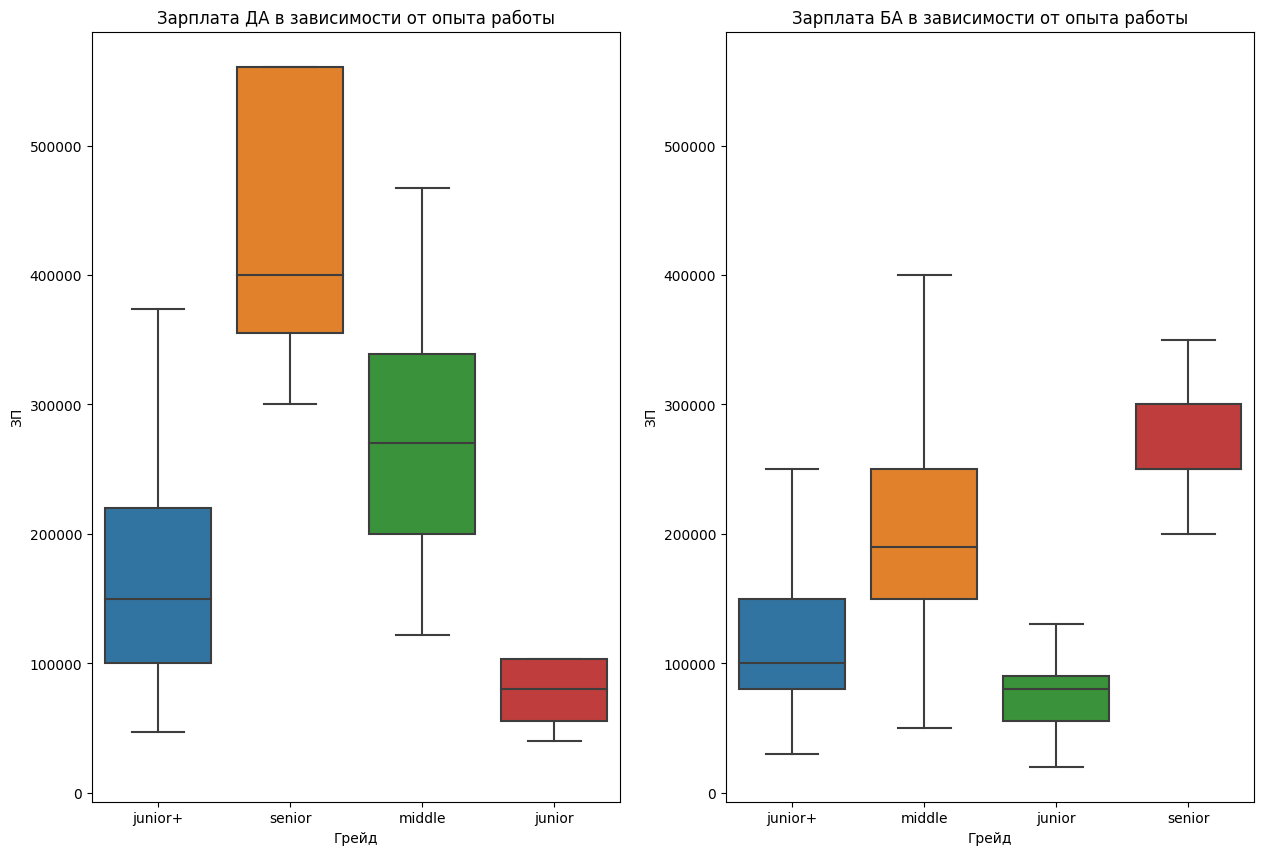

In [26]:
mask1 = da_df['salary_bin'] != "ЗП не указана"
mask2 = ba_df['salary_bin'] != "ЗП не указана"

plt.figure(figsize=(15, 10))

ax1=plt.subplot(1, 2, 1)

(sns.boxplot(
    data = da_df.loc[mask1], 
    y = 'salary_to', 
    x='experience', 
    showfliers=False, 
    showmeans=False, ax=ax1)
    .set(title = 'Зарплата ДА в зависимости от опыта работы', 
         xlabel = 'Грейд', 
         ylabel = 'ЗП'))

ax2=plt.subplot(1, 2, 2, sharey=ax1)

(sns.boxplot(
    data = ba_df.loc[mask2], 
    y = 'salary_to', 
    x='experience', 
    showfliers=False, 
    showmeans=False, ax=ax2)
    .set(title = 'Зарплата БА в зависимости от опыта работы', 
         xlabel = 'Грейд', 
         ylabel = 'ЗП'))

plt.show()

Видим вполне логичный результат, показывающий рост ЗП по мере повышения опыта работы.

[Вернуться к оглавлению](#0)

### Обработка ключевых навыков <a class="anchor" id="3.6"></a>

Займемся ключевыми навыками, необходимо обработать все навыки, а затем сделать их распределение на hard и софт.  

Для начала сделаем столбик со всеми навыками.

In [27]:
def all_skills(df):
    
    # делаем ф-цию для разделения навыков в каждой строчке
    def split_skills(dff, col):
        dff[col] = dff[col].str.lower().str.replace(' ', '_').str.replace(',_', ' ').str.split()
    
    # применяем ф-цию ко всем столбцам с навыками
    split_skills(df, 'hard_skills_from_description')
    split_skills(df, 'soft_skills_from_description')
    split_skills(df, 'key_skills_from_key_skills_field')
    
    # объединяем все навыки в один столбец
    df['key_skills_from_key_skills_field'] = \
    df['key_skills_from_key_skills_field'] + df['hard_skills_from_description'] + df['soft_skills_from_description']
    
    # делаем датафрейм из индексов и навыков
    temp = pd.DataFrame(df['key_skills_from_key_skills_field'].explode())
    
    # функция для объединения неявных дубликатов
    def imp_dups(row):
        if 'sql' in row:
            return 'sql '
        elif 'python' in row or 'pandas' in row or 'numpy' in row or 'matplotlib' in row or 'plotly' in row:
            return 'python '
        elif 'бизнес-анализ' in row or 'бизнес-аналитика' in row or 'business_analysis' in row:
            return 'business_analysis '
        elif 'data_analysis' in row or 'анализ_данных' in row:
            return 'data_analysis '
        elif 'баз' in row:
            'базы_данных '
        elif 'виз' in row or row == 'bi':
            return 'bi '
        elif 'power' in row and not 'point' in row:
            return 'power_bi '
        elif 'point' in row:
            return 'power_point '
        elif 'excel' in row:
            return 'excel '
        elif '1с' in row or '1c' in row:
            return '1С '
        elif 'spark' in row:
            return 'spark '
        elif 'olap' in row:
            return 'olap '
        else: 
            return row + ' '

    # создаем новый столбик и применяем ф-цию    
    temp['new'] = temp['key_skills_from_key_skills_field'].apply(imp_dups)
    temp.loc[(temp['new'].isnull()), 'new'] = temp.loc[(temp['new'].isnull()), 'key_skills_from_key_skills_field']
    # удаляем дубли по индексу и значению нового столбца
    temp = temp.reset_index().drop_duplicates(subset=['index', 'new'])
    # собираем обратно под свой индекс все навыки вместе 
    temp = temp.pivot_table(index='index', values='new', aggfunc='sum')
    # обновляем наш столбик и переименовываем его
    df['key_skills_from_key_skills_field'] = temp['new']
    df = df.rename(columns={'key_skills_from_key_skills_field':'all_skills'})
    # удаляем более ненужные нам столбцы
    df = df.drop(columns=['hard_skills_from_description', 'soft_skills_from_description']) 
    
    return df

In [28]:
ba_df = all_skills(ba_df)


In [29]:
ba_df.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,unknown,Москва,junior+,Полный день,Полная занятость,"90,000.00","120,000.00",100-200 тыс.,грамотность деловая_переписка умение_работать_...
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,unknown,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,управление_проектами business_analysis системн...
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Digital Design,unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,разработка_проектной_документации разработка_т...
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,СОЛВО,unknown,Санкт-Петербург,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,uml bpmn idef0 английский_язык idef _ документ...
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Сателл ИТ,unknown,Москва,junior+,Удаленная работа,Полная занятость,"200,000.00","200,000.00",200-300 тыс.,business_analysis _ документация


In [30]:
da_df = all_skills(da_df)

In [31]:
da_df.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,"Красное & Белое, розничная сеть",unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,sql vba power_point data_analysis olap power_b...
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,НОНТОН.РФ,unknown,Санкт-Петербург,junior+,Полный день,Полная занятость,"120,000.00","200,000.00",200-300 тыс.,google_analytics яндекс.метрика веб-аналитика ...
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,СБЕР,Сбер. Data Science,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,_
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,WILDBERRIES,unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,sql управленческая_отчетность excel olap _
4,80616218,Data Analyst,2023-12-03 14:43:59,Контакт,unknown,Санкт-Петербург,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,power_bi sql jira confluence документация


Теперь необходимо разделить все навыки на hard и софт.  
Решил пойти от обратного и сделать список софт скилов, все навыки, которые в него не попадут, будут относиться к hard навыкам.  
При работе с данными я заметил, что в исходных таблицах уже изначально были выделены основные софт навыки в столбце "soft_skills_from_description", поэтому я решил взять его за основу, сделать из него список, а затем уже при необходимости добавлять в него еще софт навыки.

In [32]:
# делаем список уникальных софт навыков из исходника ДА 
st_d = (
    set(
        da['soft_skills_from_description']
        .fillna(' ')
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(',_', ' ')
        .str.split()
        .sum())
)
    
st_d.remove('_')
softs_d = list(st_d)

# делаем список уникальных софт навыков из исходника БА
st_b = (
    set(
        ba['soft_skills_from_description']
        .fillna(' ')
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(',_', ' ')
        .str.split()
        .sum())
)

st_b.remove('_')
softs_b = list(st_b)

# соединяем их, удаляем задвои, и пополняем итоговый список дополнительными элементами
all_softs = softs_d + softs_b
all_softs = list(set(all_softs))
all_softs.extend(['грамот', 'перепис', 'людьми', 'лидер', 'многозадач', 'команд'])
all_softs

['адаптивность',
 'решение_проблем',
 'эмпатия',
 'внимание_к_деталям',
 'критическое_мышление',
 'документация',
 'письменная_коммуникация',
 'коммуникация',
 'тайм-менеджмент',
 'лидерство',
 'аналитическое_мышление',
 'переговоры',
 'презентация_результатов',
 'работа_в_команде',
 'принятие_решений',
 'проактивность',
 'креативность',
 'грамот',
 'перепис',
 'людьми',
 'лидер',
 'многозадач',
 'команд']

In [33]:
def separate_skills(df):
    
    # разделяем все навыки построчно и делаем временный датафрейм
    temps = pd.DataFrame(df['all_skills'].fillna('_').str.split().explode())
    
    # пишем функцию, которая будет проверять наличие навыка из списка в строке
    # и присваивать значение "soft" при совпадении, в противном случае "hard"    
    def check_skills(row):
        for i in all_softs:
            if i in row:
                return 'soft'
        return 'hard'
    
    # применяем ее к новому столбцу
    temps['sk_type'] = temps['all_skills'].apply(check_skills)
    # добавляю пробел ко всем навыкам в конце, чтобы при суммировании они не слиплись
    temps['all_skills'] = temps['all_skills'].apply(lambda x: ' ' + x)
    # делаю сводную таблицу, собирая навыки обратно в одну ячейку, но уже с разделением по hard и soft
    temps = (temps
             .reset_index()
             .pivot_table(
                 index='index', 
                 columns = 'sk_type', 
                 values = 'all_skills', 
                 aggfunc = 'sum')
             .fillna('_')
            )
    
    # добавляем получившиеся столбцы в анализируемому датафрейму
    df['hard_skills'] = temps['hard']
    df['soft_skills'] = temps['soft']
    
    return df

In [34]:
ba_df = separate_skills(ba_df)

In [35]:
ba_df.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills,soft_skills
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,unknown,Москва,junior+,Полный день,Полная занятость,"90,000.00","120,000.00",100-200 тыс.,грамотность деловая_переписка умение_работать_...,знание_инструментов_моделирования_бизнес-проц...,грамотность деловая_переписка умение_работать...
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,unknown,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,управление_проектами business_analysis системн...,управление_проектами business_analysis систем...,работа_в_команде
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Digital Design,unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,разработка_проектной_документации разработка_т...,разработка_проектной_документации разработка_...,коммуникация документация
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,СОЛВО,unknown,Санкт-Петербург,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,uml bpmn idef0 английский_язык idef _ документ...,uml bpmn idef0 английский_язык idef _,документация аналитическое_мышление
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Сателл ИТ,unknown,Москва,junior+,Удаленная работа,Полная занятость,"200,000.00","200,000.00",200-300 тыс.,business_analysis _ документация,business_analysis _,документация


In [36]:
da_df = separate_skills(da_df)

In [37]:
da_df.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills,soft_skills
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,"Красное & Белое, розничная сеть",unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,sql vba power_point data_analysis olap power_b...,sql vba power_point data_analysis olap power_...,коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,НОНТОН.РФ,unknown,Санкт-Петербург,junior+,Полный день,Полная занятость,"120,000.00","200,000.00",200-300 тыс.,google_analytics яндекс.метрика веб-аналитика ...,google_analytics яндекс.метрика веб-аналитика...,аналитическое_мышление
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,СБЕР,Сбер. Data Science,Москва,middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,_,_,_
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,WILDBERRIES,unknown,Москва,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,sql управленческая_отчетность excel olap _,sql управленческая_отчетность excel olap _,_
4,80616218,Data Analyst,2023-12-03 14:43:59,Контакт,unknown,Санкт-Петербург,junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,power_bi sql jira confluence документация,power_bi sql jira confluence,документация


Навыки разделили, теперь можно их изучать.

[Вернуться к оглавлению](#0)

### Основные hard и soft навыки <a class="anchor" id="3.7"></a>

Посмотрим, какие навыки более присуще к БА и ДА.

Подготовим функцию для построения графиков.

In [38]:
def skills_hbars(df, exp):
    plt.figure(figsize=(5, 5))
    bar_colors = ['tab:red', 'tab:pink', 'tab:orange' , 'tab:blue', 'tab:green']

    ax1 = plt.subplot(2, 1, 1)
    ((pd.DataFrame(df.loc[df['experience'] == exp, 'soft_skills']     
     .str.split()
     .explode())
     .query('soft_skills != "_"')['soft_skills']
     .value_counts(normalize=True)*100)
     .head()
     .sort_values(ascending=True)
     .plot(kind='barh', 
           rot=0, 
           grid=True,
           color=bar_colors,
           ax=ax1)
    )
    plt.title('Топ-5 soft навыков')
    plt.xlabel('Процент вакансий')

    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ((pd.DataFrame(df.loc[df['experience'] == exp, 'hard_skills']     
     .str.split()
     .explode())
     .query('hard_skills != "_"')['hard_skills']
     .value_counts(normalize=True)*100)
     .head()
     .sort_values(ascending=True)
     .plot(kind='barh', 
           rot=0, 
           grid=True,
           color=bar_colors,
           ax=ax2)
    )
    plt.title('Топ-5 hard навыков')
    plt.xlabel('Процент вакансий')
    
    plt.subplots_adjust(wspace=.15, hspace=.2)
    plt.show()


Применим функцию к базе **вакансий БА.**

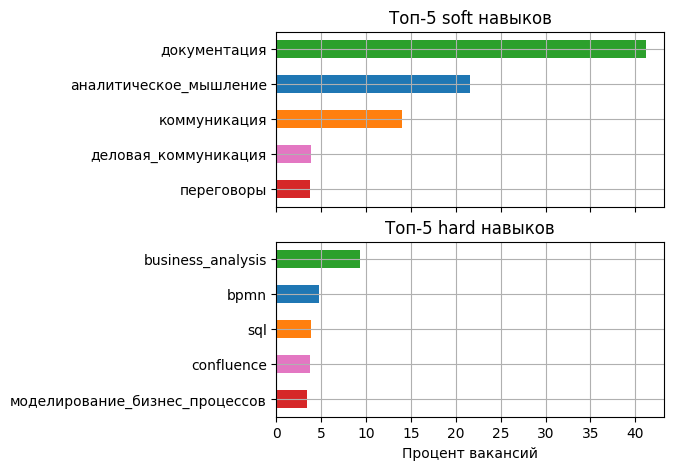

In [39]:
skills_hbars(ba_df, ba_df['experience'])

Теперь к базе **вакансий ДА.**

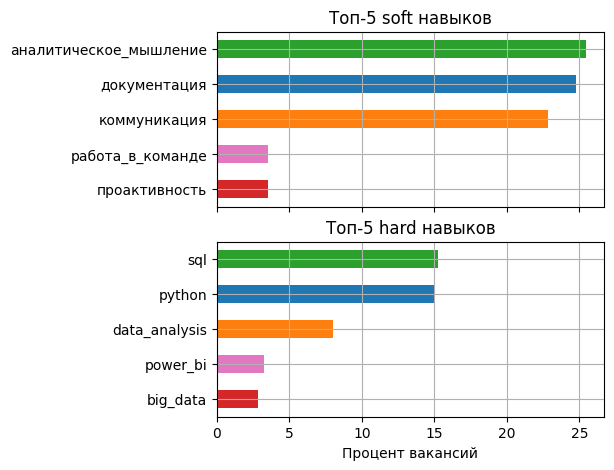

In [40]:
skills_hbars(da_df, da_df['experience'])

Глядя на графики, можно отметить, что основные soft навыки для БА и ДА будут примерно одинаковы, а вот hard навыки совсем разные, единственное совпадение для них - это знание SQL. Для БА более присуще моделирование бизнес процессов и управление ими, для ДА больше необходимо программирование и визуализация данных.

[Вернуться к оглавлению](#0)

### Распределение вакансий по опыту работы <a class="anchor" id="3.8"></a>

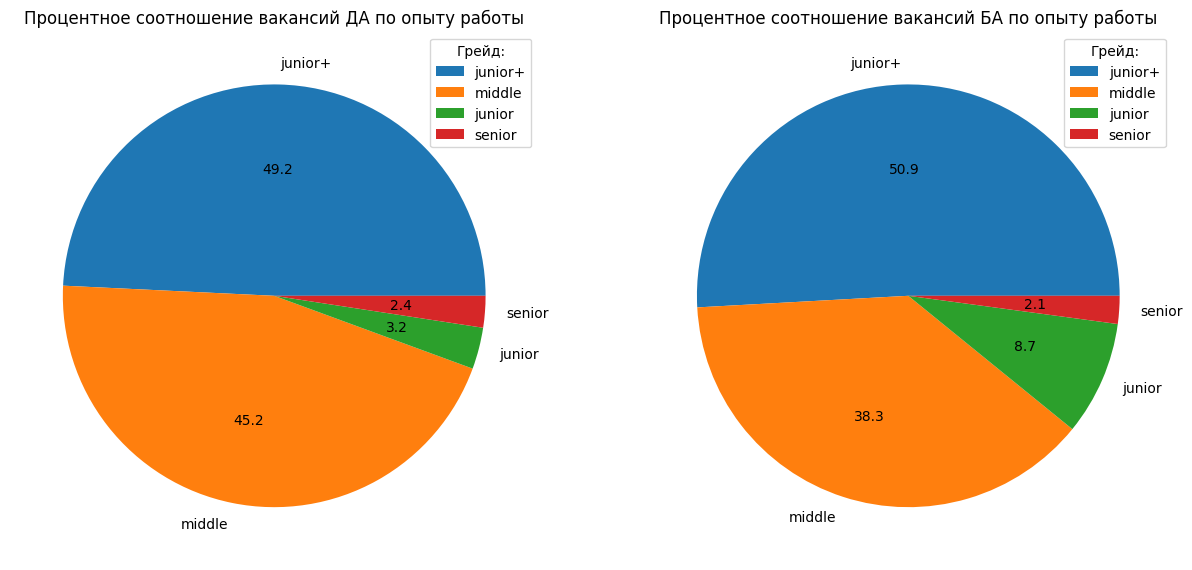

In [41]:
plt.figure(figsize=(15, 15))
ax1=plt.subplot(1, 2, 1)

(
    da_df
    .value_counts('experience')
    .plot(
        autopct='%.1f', 
        kind='pie', 
        title='Процентное соотношение вакансий ДА по опыту работы',
        ax=ax1)
)
plt.legend(title='Грейд:')
plt.ylabel('')


ax2=plt.subplot(1, 2, 2)

(
    ba_df
    .value_counts('experience')
    .plot(
        autopct='%.1f', 
        kind='pie', 
        title='Процентное соотношение вакансий БА по опыту работы',
        ax=ax2)
)
plt.legend(title='Грейд:')
plt.ylabel('')
plt.show()

В целом, мы можем наблюдать, что распределение вакансий по опыту работы примерно одинаково для ДА и БА, особенно позиции junior+ и senior, однако стоит отметить, что позиции junior специалистов более востребованы в БА, чем в ДА.  

[Вернуться к оглавлению](#0)

### Распределение вакансий по территориальному расположению <a class="anchor" id="3.9"></a>

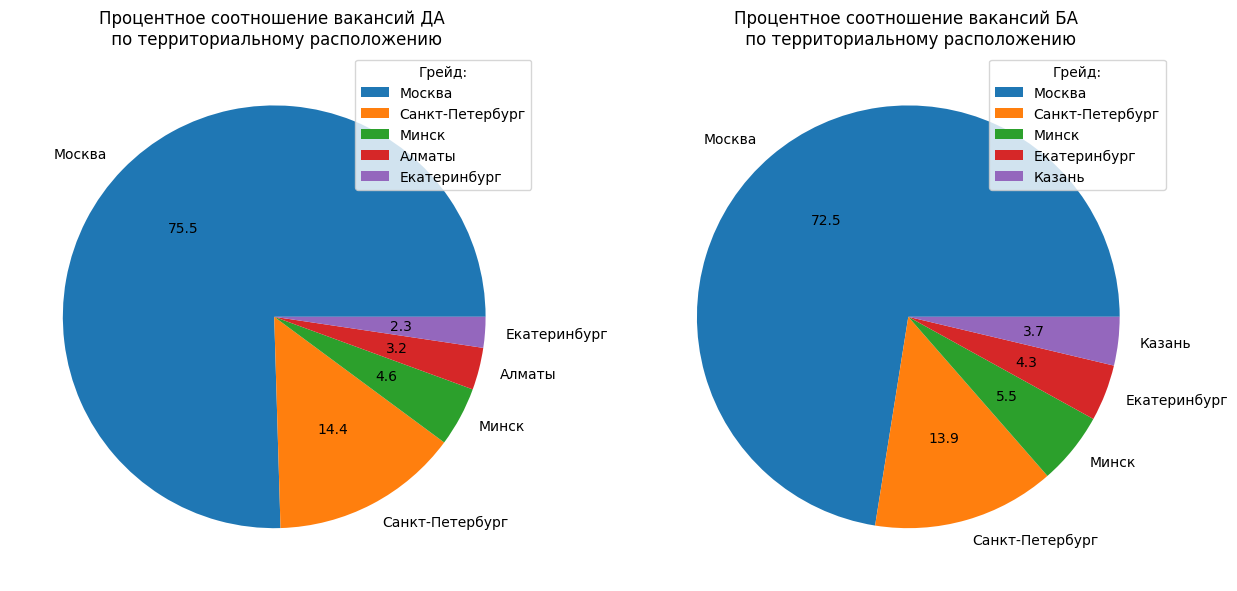

In [42]:
plt.figure(figsize=(15, 15))
ax1=plt.subplot(1, 2, 1)

(
    da_df
    .value_counts('area')
    .head()
    .plot(
        autopct='%.1f', 
        kind='pie', 
        title='Процентное соотношение вакансий ДА \n по территориальному расположению',
        ax=ax1)
)
plt.legend(title='Грейд:')
plt.ylabel('')


ax2=plt.subplot(1, 2, 2)

(
    ba_df
    .value_counts('area')
    .head()
    .plot(
        autopct='%.1f', 
        kind='pie', 
        title='Процентное соотношение вакансий БА \n по территориальному расположению',
        ax=ax2)
)
plt.legend(title='Грейд:')
plt.ylabel('')
plt.show()

Для обоих направлений можем отметить, что чаще всего аналитиков ищут Москве, СПб и Минске

[Вернуться к оглавлению](#0)

##  Определение наиболее желаемых кандидатов на вакансии ДА и БА <a class="anchor" id="5"></a>

Далее мы рассмотрим наиболее желаемых кандитов по самым важным soft и hard навыкам в разрезе грейдов для ДА и БА.

[Вернуться к оглавлению](#0)

### Топ навыки БА <a class="anchor" id="5.1"></a>

**БА junior.**

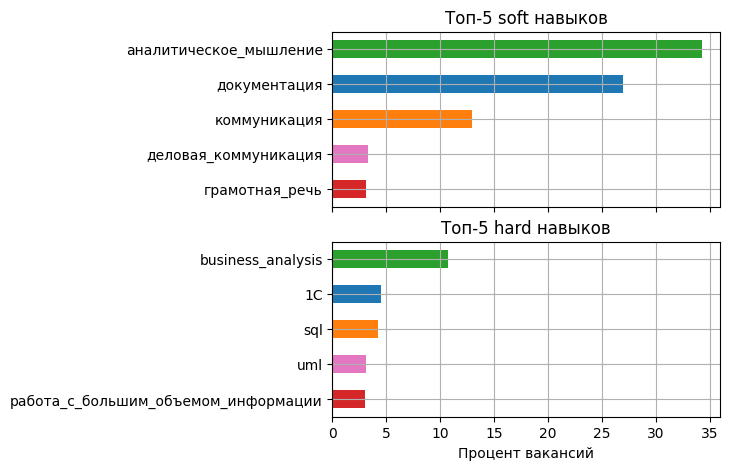

In [43]:
skills_hbars(ba_df, 'junior')

**БА junior+.**

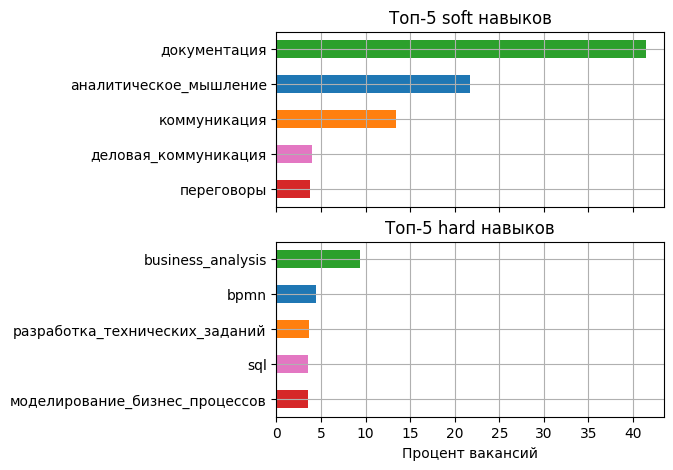

In [44]:
skills_hbars(ba_df, 'junior+')

**БА middle.**

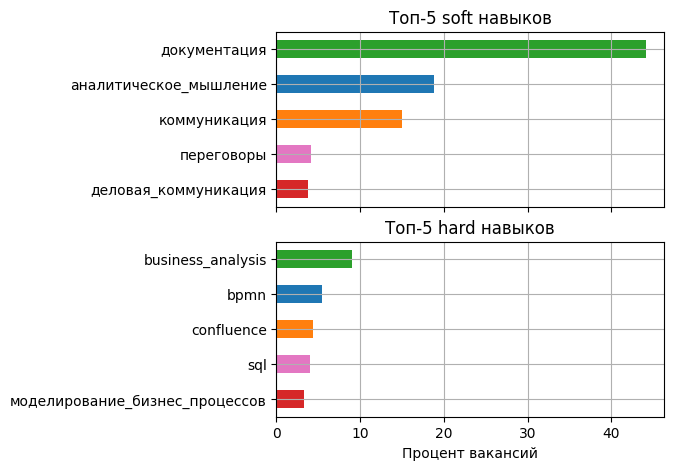

In [45]:
skills_hbars(ba_df, 'middle')

**БА senior.**

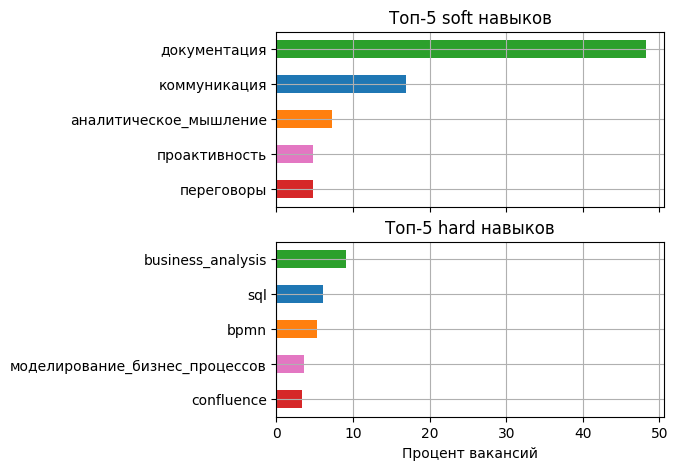

In [46]:
skills_hbars(ba_df, 'senior')

Требования к soft навыкам специалистов БА почти одинаковы на всех грейдах, в основном это: документация, аналитическое мышление и коммуникация. Лишь у senior специалистов помимо этого еще требуется навык управления командой.  

По hard навыкам у всех грейдов тоже примерно одинаково все, везде в большей степени, само собой, требуется знание бизнес-анализа, sql. На фоне остальных грейдов больше всего выделяются позиции junior специалистов - только у них в топ-5 hard навыков входит знание 1С и работа с большим объемом информации, и только у них сюда не вошли BPMN и моделирование бизнес процессов.

[Вернуться к оглавлению](#0)

### Топ навыки ДА <a class="anchor" id="5.2"></a>

**ДА junior**

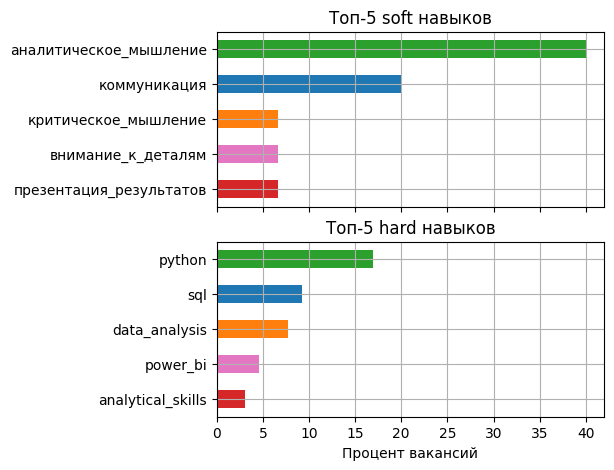

In [47]:
skills_hbars(da_df, 'junior')

**ДА junior+**

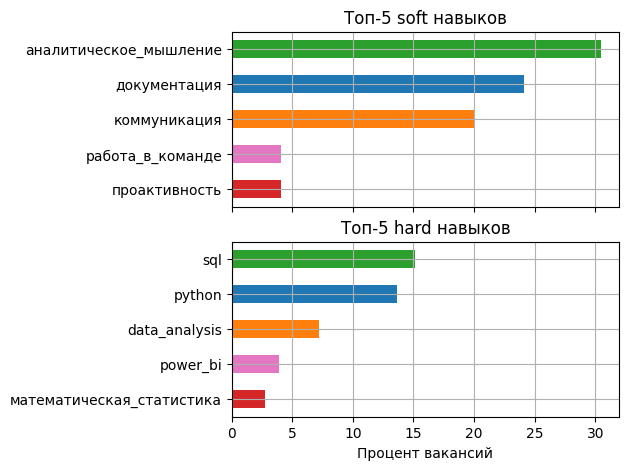

In [48]:
skills_hbars(da_df, 'junior+')

**ДА middle**

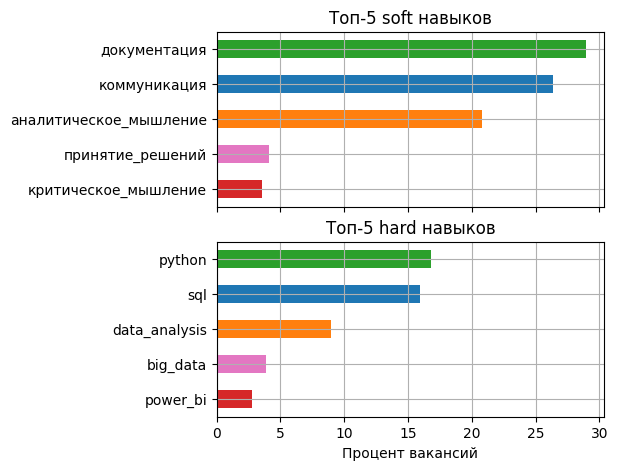

In [49]:
skills_hbars(da_df, 'middle')

**ДА senior**

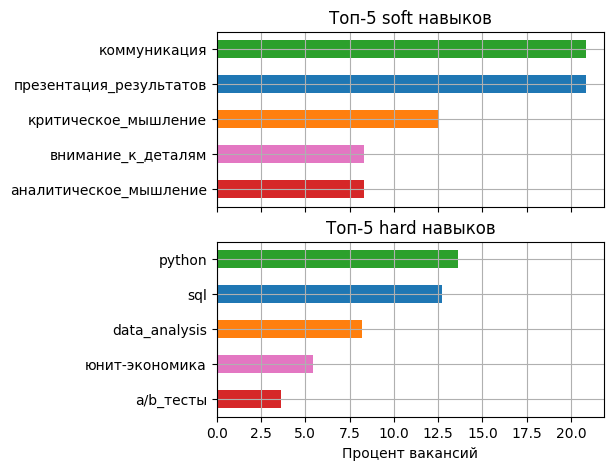

In [50]:
skills_hbars(da_df, 'senior')

Как и у БА направления, самые важные для ДА soft навыки на всех грейдах тоже примерно одинаковы, на всех этапах потребуется аналитическое и критическое мышление, коммуникация, документация. Из исключений стоит отметить, что на позициях junior ищут более проактивных людей, а, начиная с middle уровня, потребуется умение принятия решений. Также отмечу потребность senior специалистов, умеющих презентовать результаты.  

Тремя самыми важными hard навыками на всех грейдах ДА направления являются: python, sql, data_analysis.  
Для junior и junior+ к самым важным hard навыкам будут относиться умение работы в Power BI и знание мат.статистики,  
для middle специалиста тоже будет необходим Power BI. Больше всего отличаются вакансии senior грейда, помимо трех основных навыков для них важно знание юнит-экономики и умение проводить A/B тесты.

[Вернуться к оглавлению](#0)

## Определение типичного места работы <a class="anchor" id="4"></a>

Далее я определю типичное место работы для ДА и БА отдельно для каждого грейда по следующим параметрам: Топ работодателей, зарплата, тип занятости, график работы.  
Ранее мы уже отмечали, что в большинстве случаев работодателям требуются специалисты на полный день, поэтому в параметре "график работы" в основном будем рассматривать удаленную работу.

[Вернуться к оглавлению](#0)

### Общая функция для вывода графиков. <a class="anchor" id="4.1"></a>

Сначала подготовим функцию, которая будет выводить 4 графика (по одному на каждый изучаемый параметр) для выбранного грейда специалиста и направления в аналитике.

In [51]:
def barplots(name, df, exp):
    print('')
    print('                                       Типичное место работы для', name, 'специалиста грейда', exp)
    print('')
    
    plt.figure(figsize=(20, 15))
    bar_colors = ['tab:green', 'tab:blue', 'tab:orange' , 'tab:pink', 'tab:red']
    
    ax1 = plt.subplot(2, 2, 1)
    ((df.loc[(df['experience']==exp), 'salary_bin']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,              
           grid=True,
           color=bar_colors,
           ax=ax1)
    )    
    plt.title('Зарплатная вилка')
    plt.ylabel('Процент вакансий')
    
    ax2 = plt.subplot(2, 2, 3)    
    ((df.loc[(df['experience']==exp), 'employer']
     .value_counts(normalize=True)*100)
    .head()
    .plot(kind='bar',
          rot=45,
          grid=True,
          color=bar_colors,
          ax=ax2)
    )  
    plt.title('Топ-5 работодателей')
    plt.ylabel('Процент вакансий')
    
    ax3 = plt.subplot(2, 2, 2)
    ((df.loc[(df['experience']==exp), 'employment']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,              
           grid=True,
           color=bar_colors,
           ax=ax3)
    )    
    plt.title('Тип занятости')
    plt.ylabel('Процент вакансий')
    
    ax4 = plt.subplot(2, 2, 4)
    ((df.loc[(df['experience']==exp), 'schedule']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,
           grid=True,
           color=bar_colors,
           ax=ax4)
    )    
    plt.title('График работы')
    plt.ylabel('Процент вакансий')
    
    plt.subplots_adjust(wspace=.15, hspace=.35)
    plt.show()
    
    print(50*'*')
    print('Таблица топ-5 работодателей по количеству вакансий')
    display(pd.DataFrame(df.loc[(df['experience']==exp), 'employer'].value_counts().head()))


[Вернуться к оглавлению](#0)

### Вакансии БА <a class="anchor" id="4.2"></a>

Для начала рассмотрим вакансии БА. 


                                       Типичное место работы для БА специалиста грейда junior



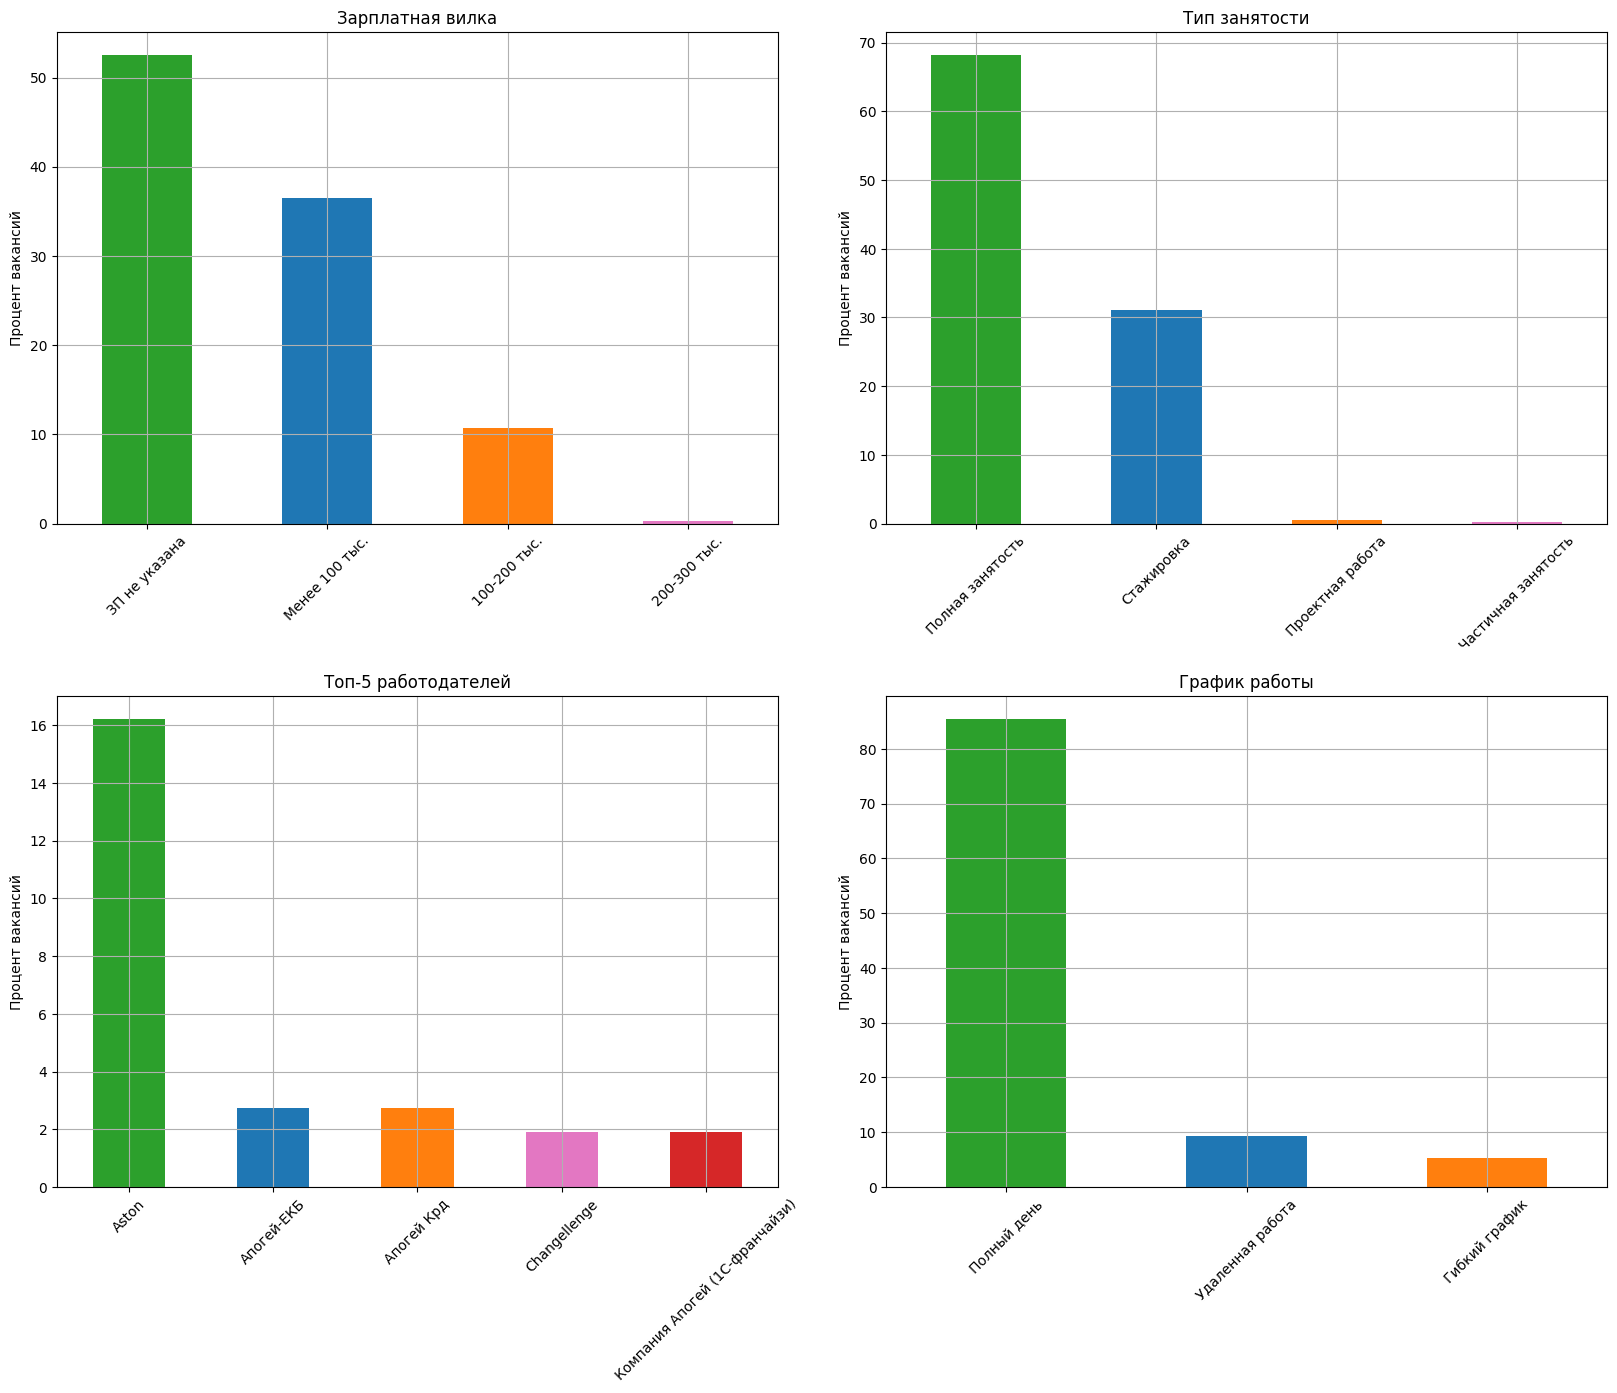

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
Aston,59
Апогей-ЕКБ,10
Апогей Крд,10
Changellenge,7
Компания Апогей (1С-франчайзи),7


In [52]:
barplots('БА', ba_df, 'junior')

Итак, рассмотрим **вакансии БА для соискателей без опыта работы (junior).**  
На самом деле, здесь мы видим довольно очевидные результаты для вакансий, не требующих опыта работы.  

Стоит обратить внимание, что есть вакансии для junior с ЗП 200-300, посмотрим на это внимательнее.

In [53]:
ba_df.query('experience == "junior" & salary_bin == "200-300 тыс." ')

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills,soft_skills
650,88387266,Бизнес-аналитик в компанию-разработчик ИТ-прод...,2023-11-17 10:40:21,Департамент Ф53,unknown,Москва,junior,Удаленная работа,Полная занятость,"140,000.00","200,000.00",200-300 тыс.,_ confluence документация аналитическое_мышление,_ confluence,документация аналитическое_мышление


Такая вакансия оказалась всего одна, вернемся к исходнику, чтоб перейти по ссылке на вакансию и проверить, скорее всего, здесь ошибка в требуемом опыте работы. 

In [54]:
ba.query('id == 88387266')['alternate_url']

650    https://hh.ru/vacancy/88387266
Name: alternate_url, dtype: object

Действительно, в самой вакансии не указан опыт работы, но в ее описании есть требование о наличии опыта от двух лет в IT, поэтому заменим в этой вакансии опыт работы на junior+, а затем повторно выведем графики.

In [55]:
ba_df.loc[650, 'experience'] = 'junior+'


                                       Типичное место работы для БА специалиста грейда junior



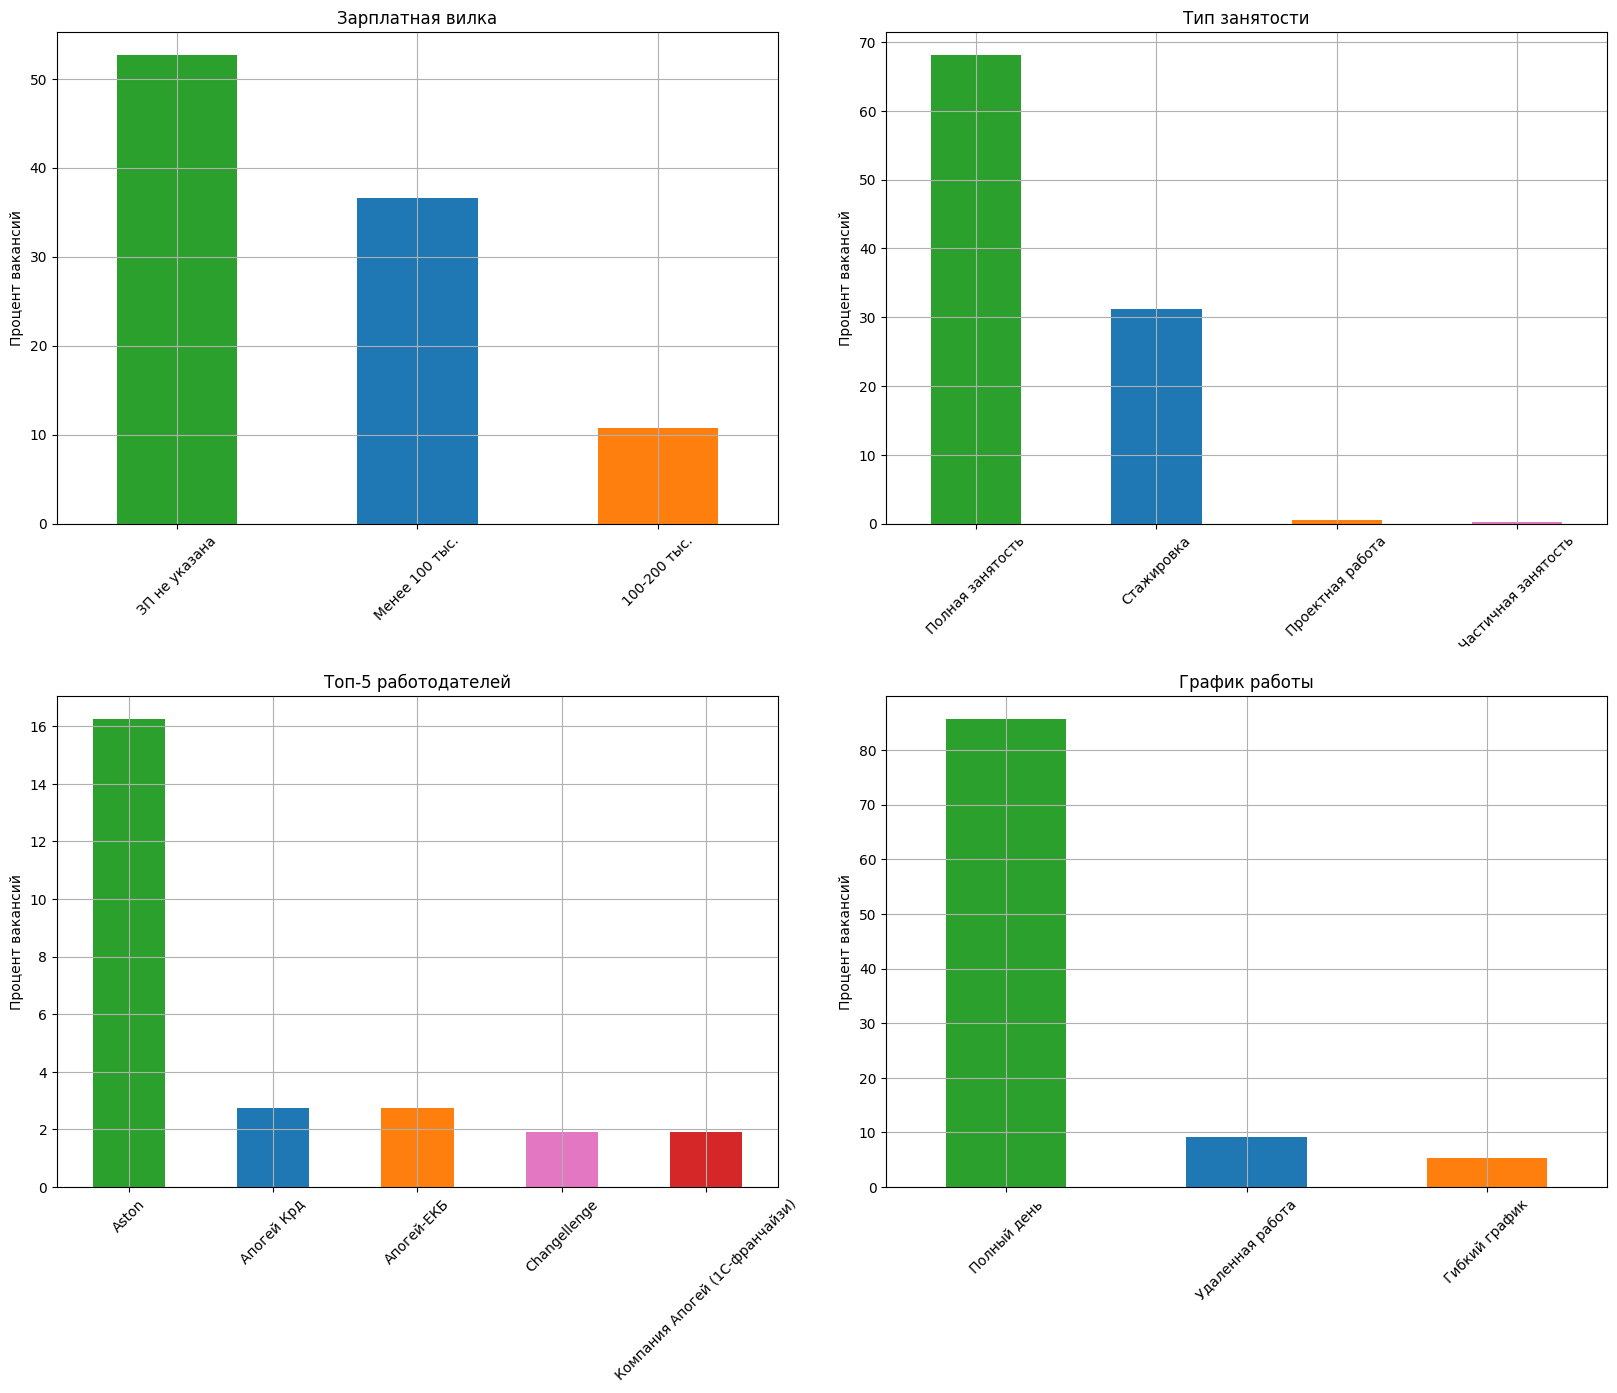

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
Aston,59
Апогей Крд,10
Апогей-ЕКБ,10
Changellenge,7
Компания Апогей (1С-франчайзи),7


In [56]:
barplots('БА', ba_df, 'junior')

**Зарплатная вилка**. Почти 40% вакансий предлагают ЗП **до 100 тыс. руб.** (учитывая, что в более 50% вакансий ЗП не указана) и лишь около 10% от 100 до 200 тыс. руб. 

**Топ работодателей.** Больше всего junior специалисты требуются в компании **Aston** (около 16% вакансий), а также в группе компаний **Апогей** *(около 10% в сумме)*.

**Тип занятости.** Наиболее предпочтительным типом занятости *(почти 70%)* будет **полная**, чуть *более 30%* вакансий же предлагают **стажировку**.

**График работы.** Лишь *около 10% вакансий* рассматривают возможность **удаленной работы** и 5% гибкого графика. 

Переходим к **БА junior+** (1-3 года опыта).


                                       Типичное место работы для БА специалиста грейда junior+



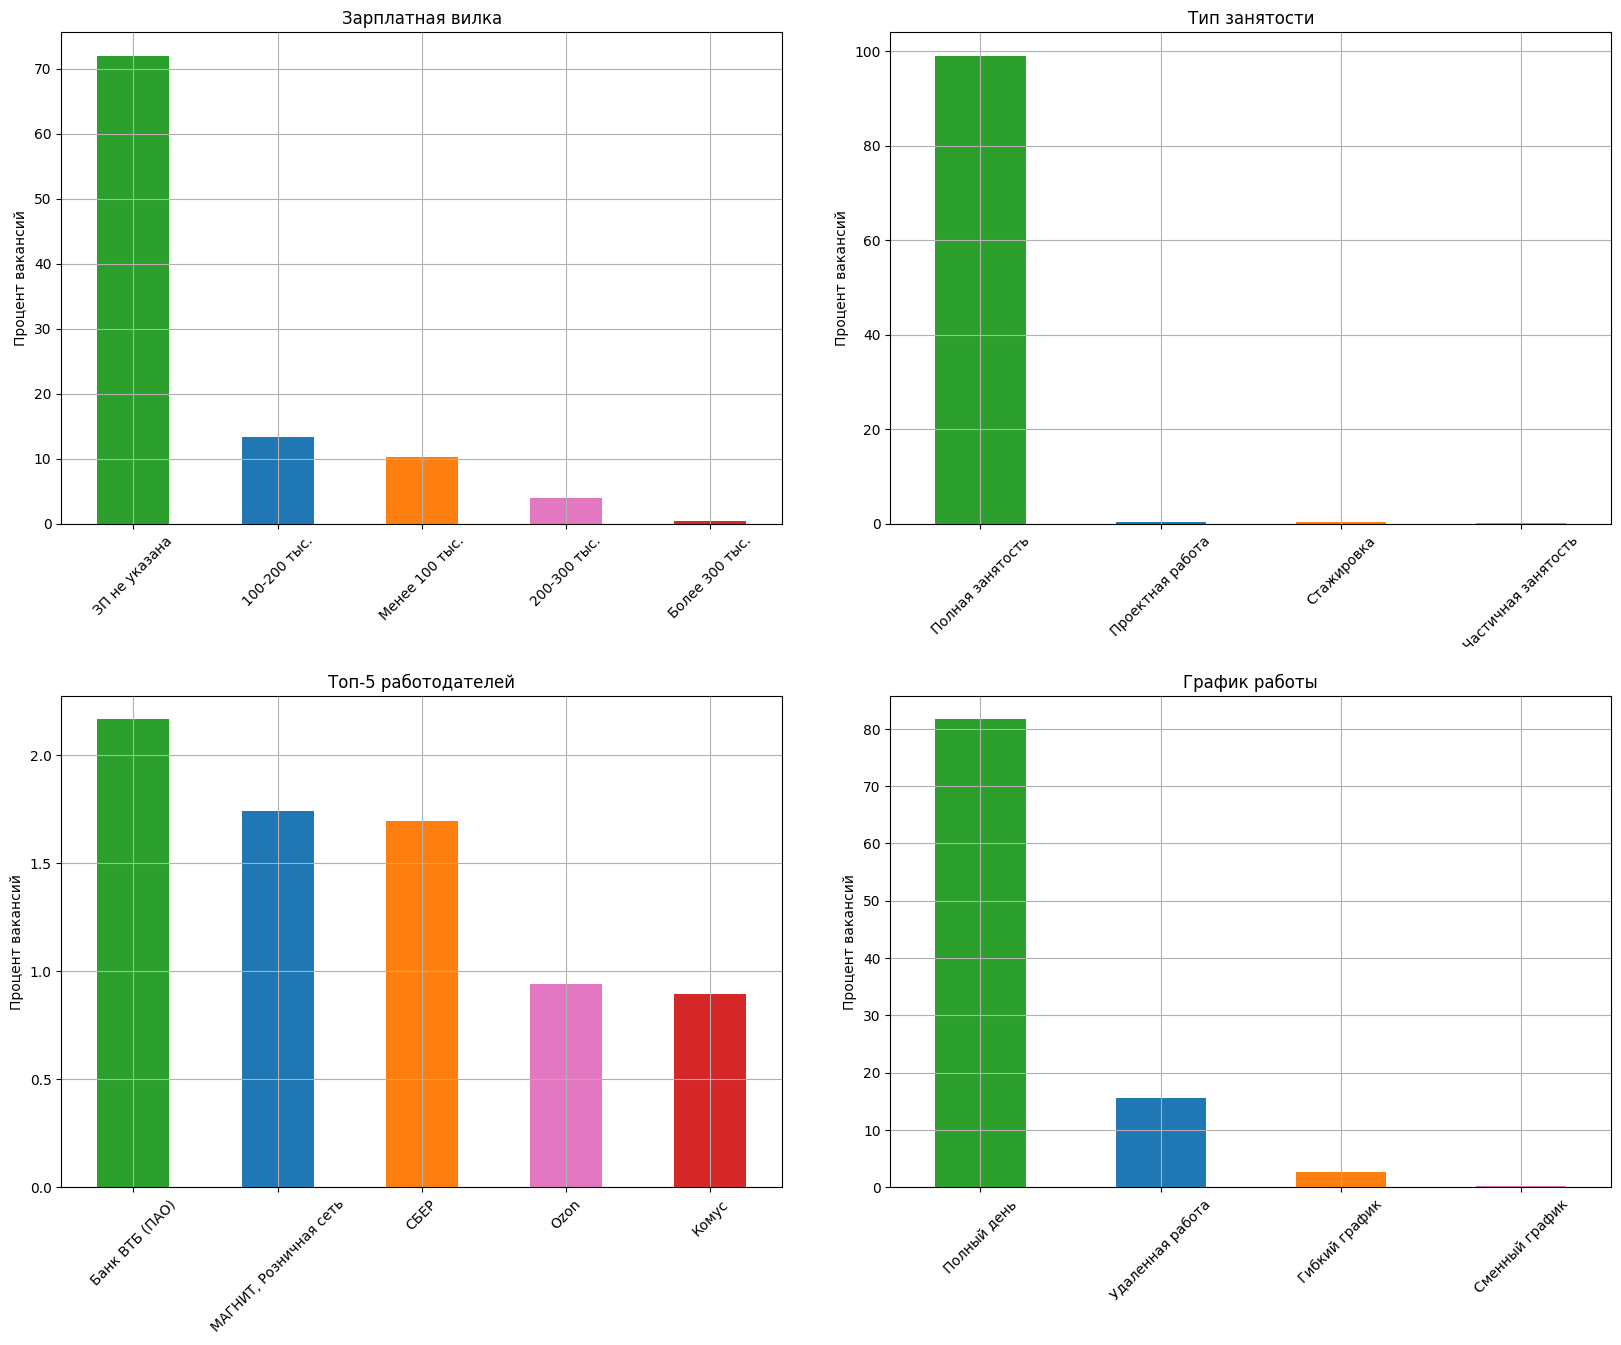

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
Банк ВТБ (ПАО),46
"МАГНИТ, Розничная сеть",37
СБЕР,36
Ozon,20
Комус,19


In [57]:
barplots('БА', ba_df, 'junior+')

**Зарплатная вилка.** Здесь уже в 75% вакансий ЗП не указана. В основном ЗП этой категории специалистов составляет **100-200 тыс. руб.**, чуть *реже* предлагаемая ЗП будет *менее 100 тыс.*  

**Топ работодателей.** Больше всего вакансий для специалистов данного грейда предлагают: **Банк ВТБ, МАГНИТ, СБЕР, Ozon, ПСБ** *(примерно 1%-2% вакансий каждый)*  

**Тип занятости.** Почти 100% вакансий на полную занятость.

**График работы.** Здесь картина почти такая же, как у junior специалистов, стоит отметить **рост количества вакансий с удаленной работой** *до 15%* от общего числа.

Далее **БА middle** (3-6 лет опыта).


                                       Типичное место работы для БА специалиста грейда middle



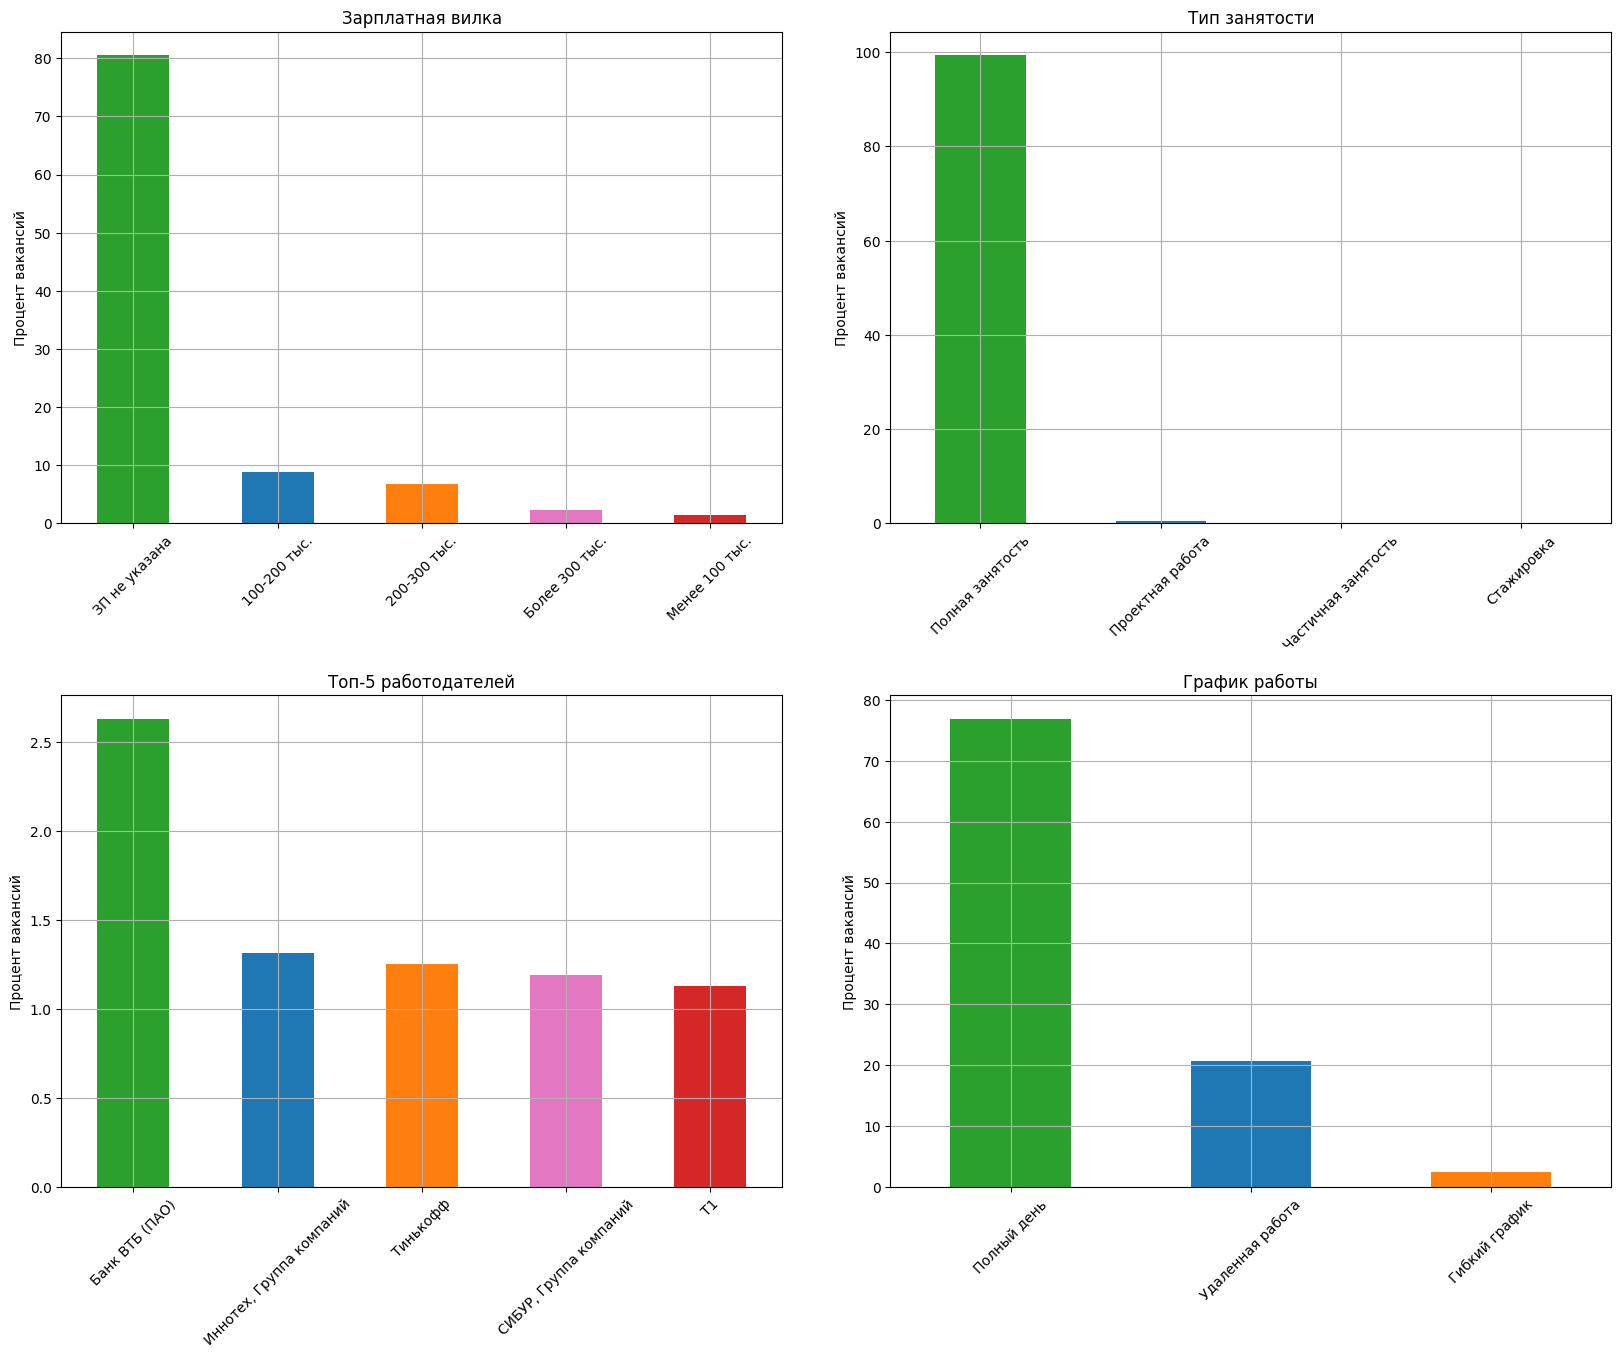

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
Банк ВТБ (ПАО),42
"Иннотех, Группа компаний",21
Тинькофф,20
"СИБУР, Группа компаний",19
Т1,18


In [58]:
barplots('БА', ba_df, 'middle')

**Зарплатная вилка.** С повышением грейда увеличилось и количество вакансий, где ЗП не указана. Как и в прошлом грейде, здесь тоже чаще всего встречаются вакансии с ЗП в 100-200 тыс. руб., но за ними уже вакансии с 200-300 тыс. руб.

**Топ работодателей.** Здесь все еще лидерует **Банк ВТБ** *(более 2.5% вакансий)*, за ним в топе расположились Иннотех, Тинькофф, СИБУР и СБЕР *(примерно 1.3% вакансий на каждого)*.

**Тип занятости.** Без изменений, *почти 100%* - **полная занятость**.

**График работы.** Снова наблюдается **рост вакансий с удаленной работой**, показатель уже перешагнул порог в *20%.*

Осталось рассмотреть **БА senior** (6+ лет опыта).


                                       Типичное место работы для БА специалиста грейда senior



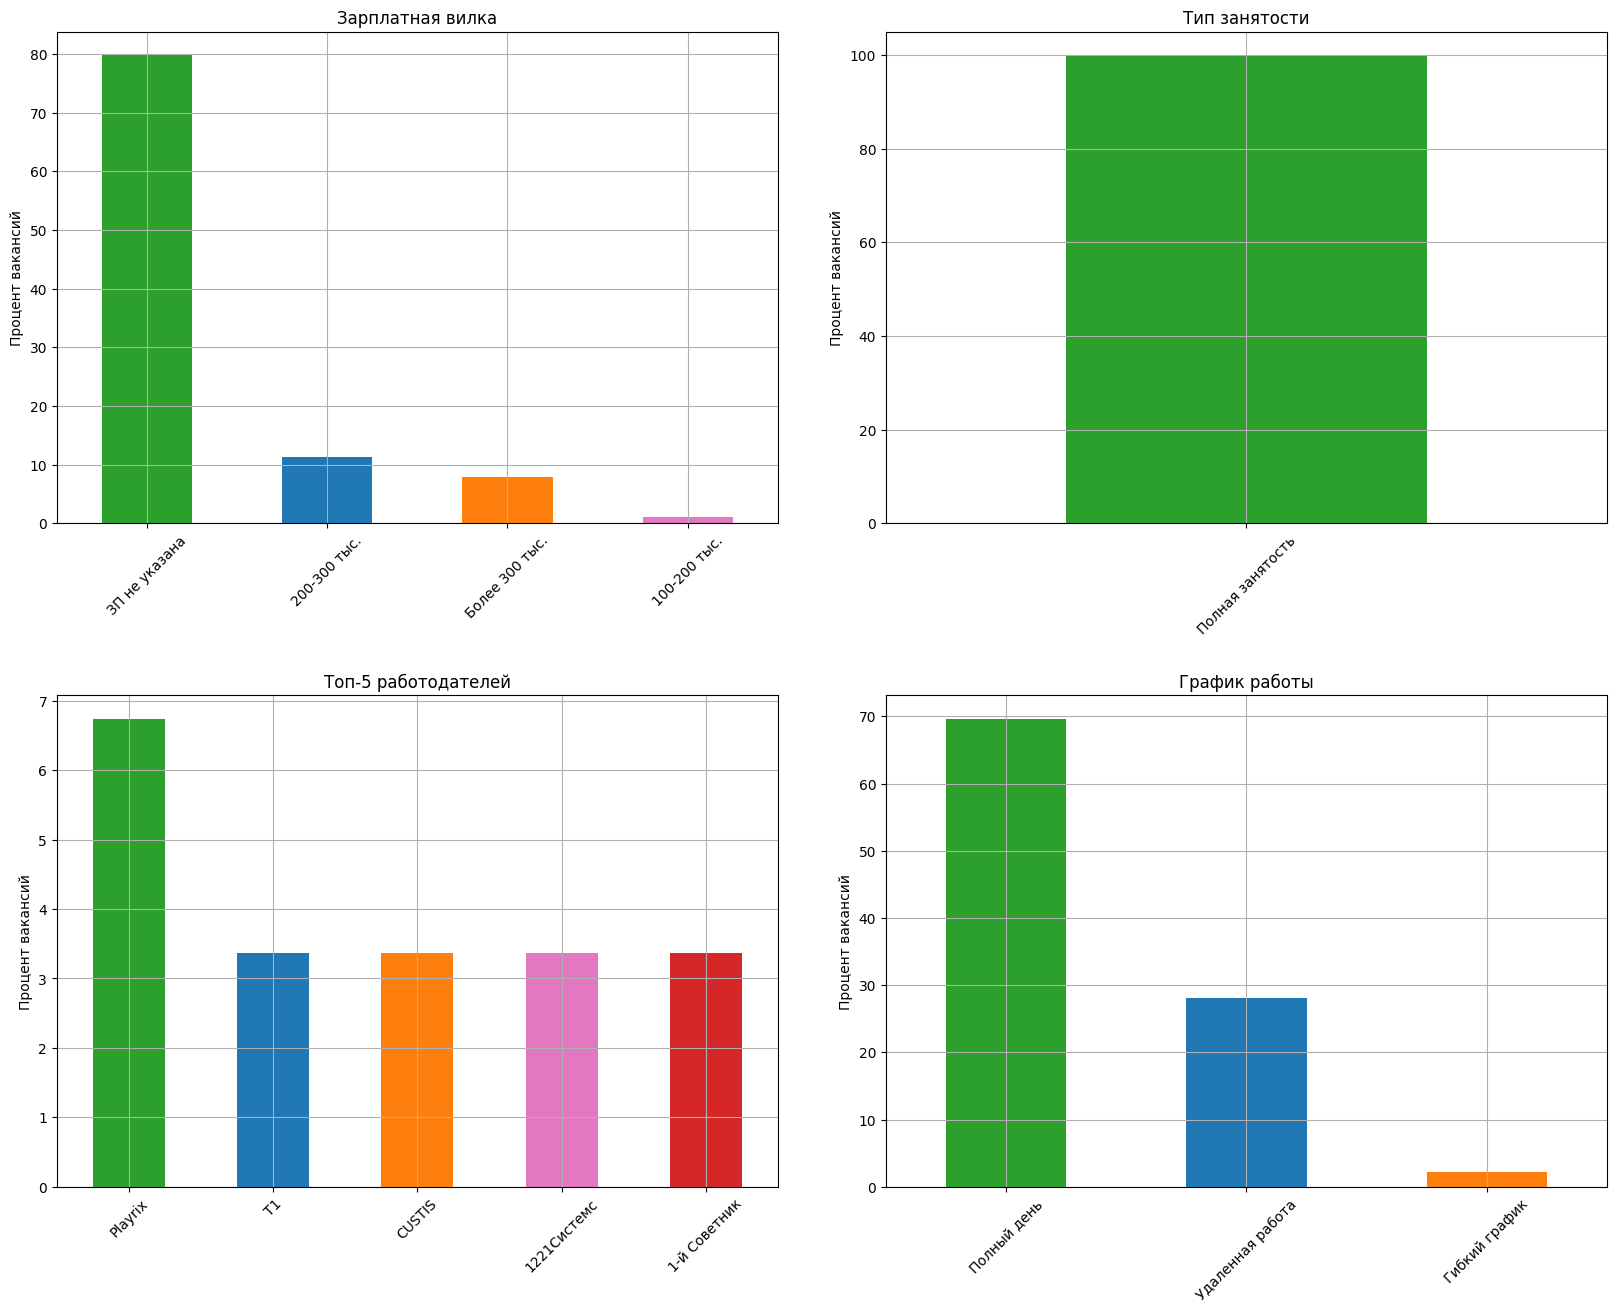

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
Playrix,6
Т1,3
CUSTIS,3
1221Системс,3
1-й Советник,3


In [59]:
barplots('БА', ba_df, 'senior')

**Зарплатная вилка.** *80% вакансий без указания ЗП.* Преимущественно (*около 10%*) ЗП для вакансий senior грейда составляет **200-300 тыс.** Чуть меньшее количество (*около 8%*) составляют вакансии с ЗП **более 300 тыс.**  
Стоит отметить, что вакансии senior с ЗП менее 100 тыс. отсутствуют вовсе.

**Топ работодателей.** Картина по работодателям на этом грейде изменилась, из топа пропали банки, магазины, маркетплейсы. Senior специалистов ищут **IT-компании**, среди которых: **Playrix** (почти *7% вакансий*), Ультиматек, 1221Системс, 1-ый Советник, CUSTIS (около 3.5% вакансий каждая).

**Тип занятости.** Остались вакансии исключительно с **полной занятостью**.

**График работы.** Senior специалисты имеют наибольший выбор вакансий с **удаленной работой** (почти *30%*).

[Вернуться к оглавлению](#0)

### Вакансии ДА <a class="anchor" id="4.3"></a>

Теперь рассмотрим по грейдам вакансии ДА.

Начинаем с **junior ДА** (без опыта).


                                       Типичное место работы для ДА специалиста грейда junior



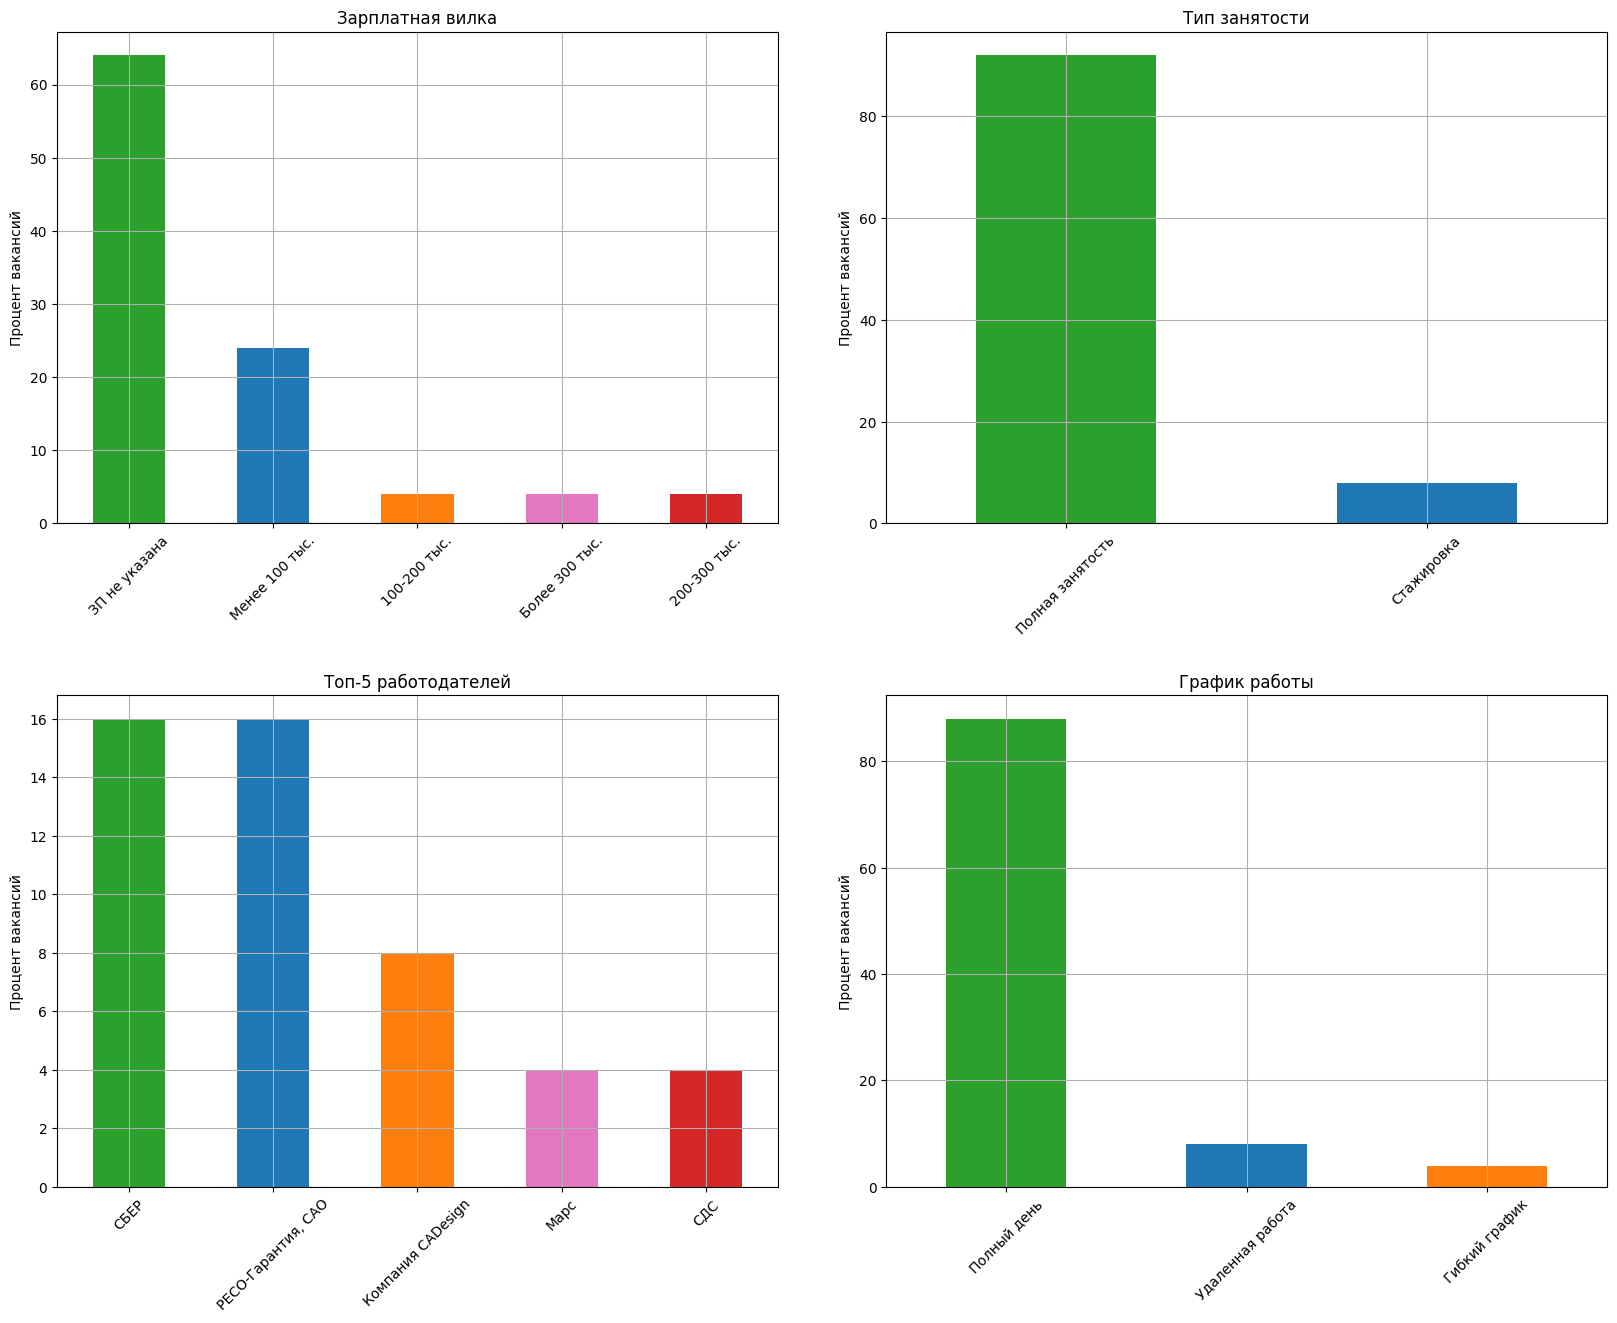

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
СБЕР,4
"РЕСО-Гарантия, САО",4
Компания CADesign,2
Марс,1
СДС,1


In [60]:
barplots('ДА', da_df, 'junior')

**Зарплатная вилка**. Около 65% вакансий без указания ЗП. В основном junior специалисту предлагается ЗП **до 100 тыс. руб.** (почти 25% вакансий).

**Топ работодателей.** Больше всего junior специалисты требуются в **СБЕР** и **РЕСО-Гарантия** (*по 16%* вакансий).

**Тип занятости.** Наиболее предпочтительным типом занятости *(около 90%)* будет **полная**, *почти 10%* вакансий же предлагают **стажировку**.

**График работы.** Лишь *около 7% вакансий* рассматривают возможность **удаленной работы**, еще меньше гибкий график. 

Переходим к **junior+ ДА** (1-3 года опыта).


                                       Типичное место работы для ДА специалиста грейда junior+



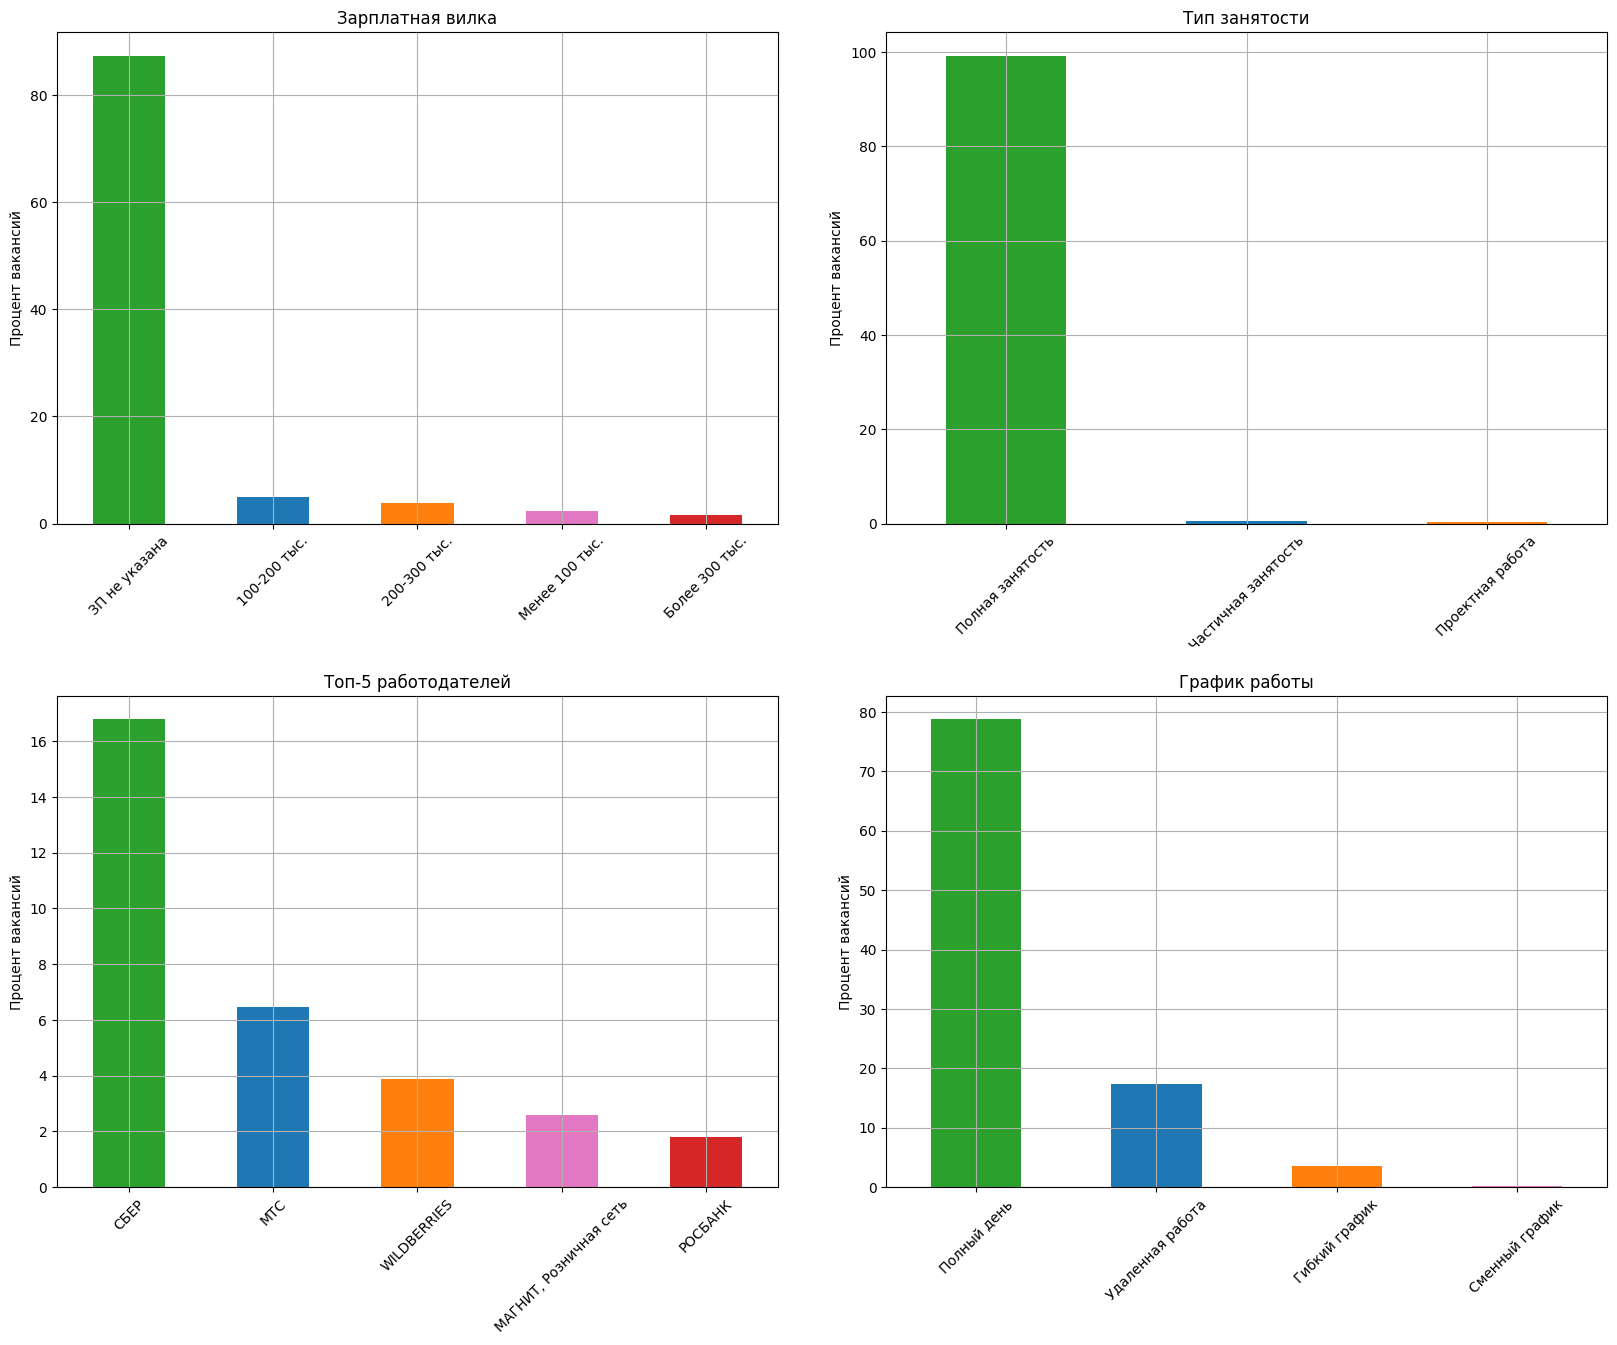

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
СБЕР,65
МТС,25
WILDBERRIES,15
"МАГНИТ, Розничная сеть",10
РОСБАНК,7


In [61]:
barplots('ДА', da_df, 'junior+')

In [62]:
da_df.loc[(da_df['experience']=='junior+') & (da_df['salary_to'] !=0), 'salary_to'].median()

150000.0

In [63]:
da_df.loc[(da_df['experience']=='junior+') & (da_df['salary_to'] !=0), 'salary_to'].mean()

170318.3673469388

**Зарплатная вилка.** Почти в **90% вакансий ЗП не указана**, выборка оставшихся значений слишком мала, поэтому верный ответ дать в данном случае невозможно. Если все-таки смотреть по оставшимся, то можно сделать вывад, что в основном ЗП на этом грейде будет составлять примерно *100-200 тыс.* 

**Топ работодателей.** Больше всего вакансий для специалистов данного грейда предлагает **СБЕР** (*около 17%* вакансий)  

**Тип занятости.** Почти 100% вакансий на полную занятость.

**График работы.** Количество вакансий с **удаленной работой** для этого грейда составило уже почти *20% вакансий*.

**ДА middle** (3-6 лет опыта).


                                       Типичное место работы для ДА специалиста грейда middle



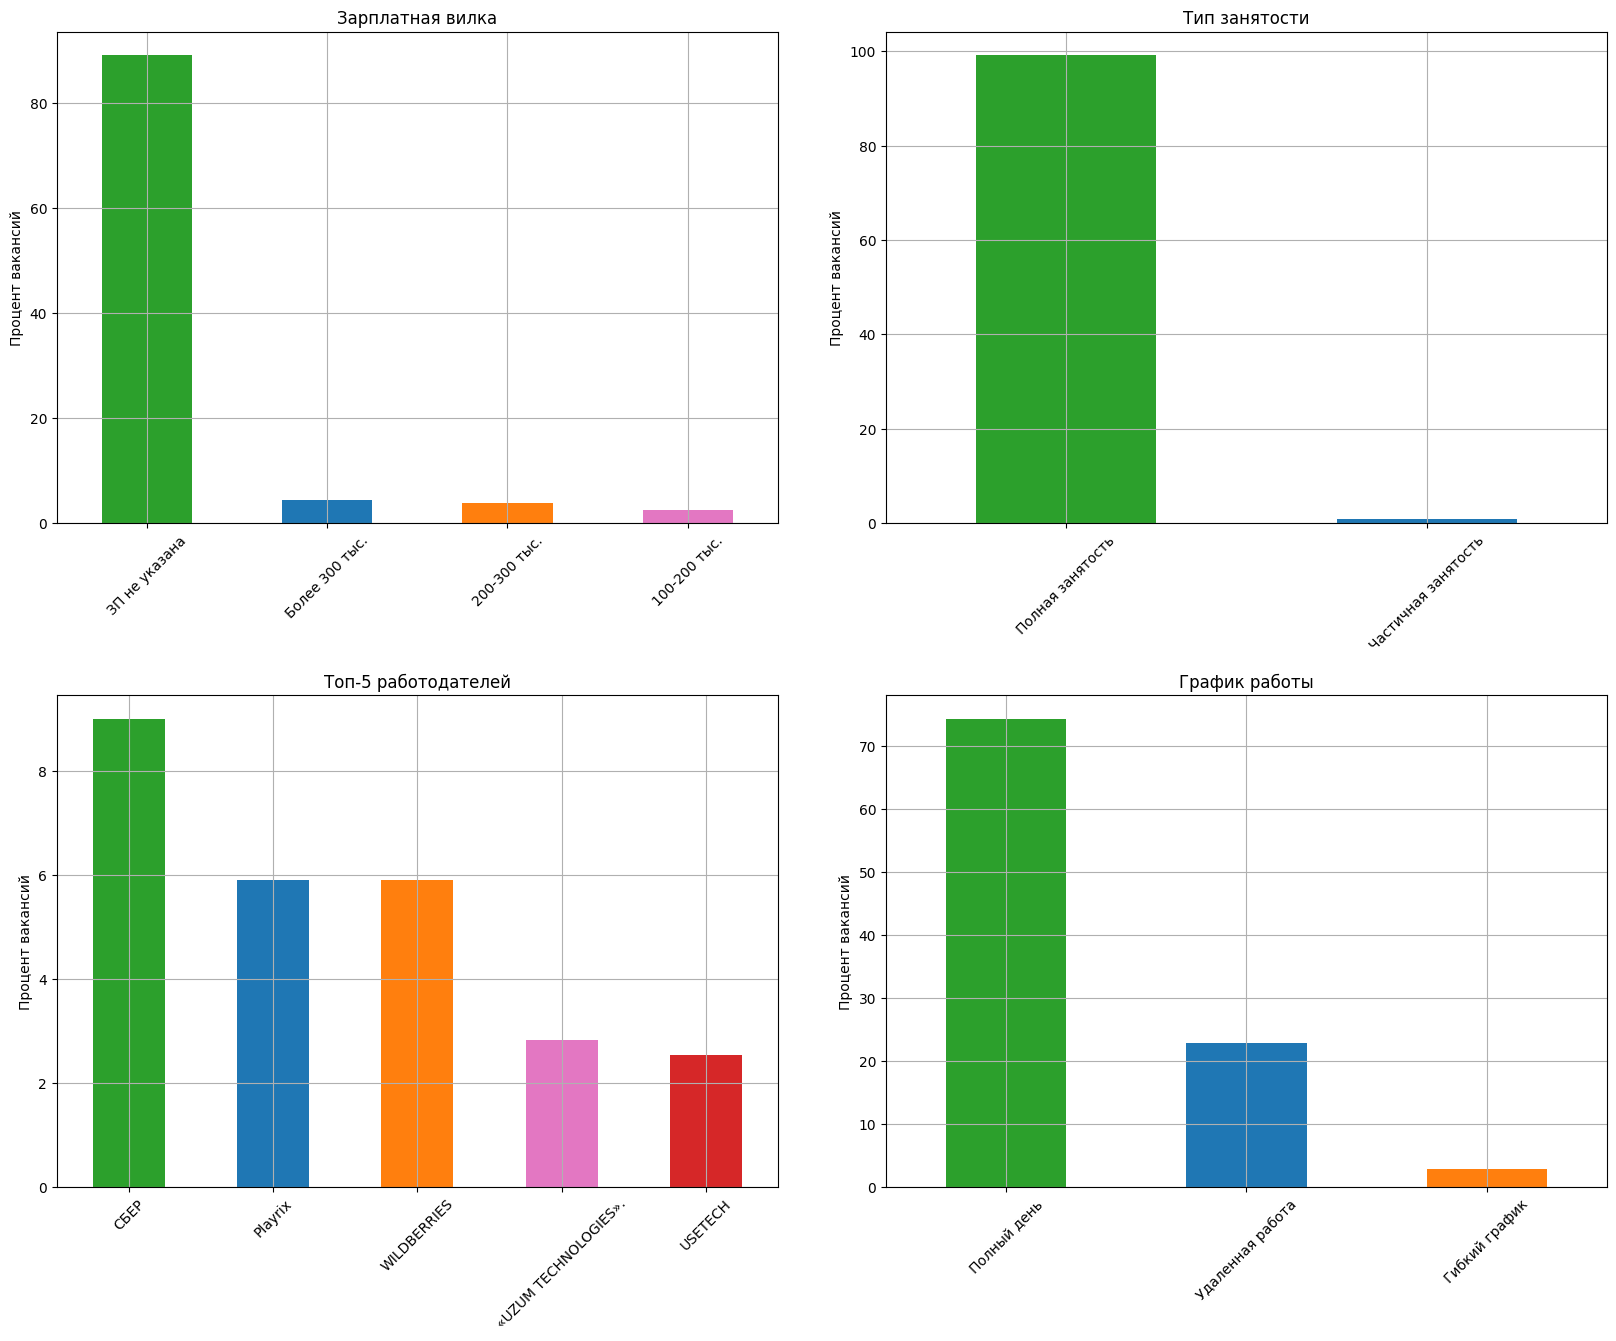

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
СБЕР,32
Playrix,21
WILDBERRIES,21
«UZUM TECHNOLOGIES».,10
USETECH,9


In [64]:
barplots('ДА', da_df, 'middle')

In [65]:
da_df.loc[(da_df['experience']=='middle') & (da_df['salary_to'] !=0), 'salary_to'].median()

270000.0

In [66]:
da_df.loc[(da_df['experience']=='middle') & (da_df['salary_to'] !=0), 'salary_to'].mean()

283898.71794871794

**Зарплатная вилка.** Ситуация с вакансиями, где **ЗП не указана**, такая же, как и у junior+ специалистов, **около 90%**. По оставшимся значениям можно сказать, что в среднем ЗП middle специалиста предлагается в размере *200-300 тыс. руб*.  


**Топ работодателей.** Здесь все еще лидерует **Банк ВТБ** *(около 9% вакансий)*, за ним в топе расположились WILDBERRIES и Playrix (почти по 6% вакансий на каждого).

**Тип занятости.** Без изменений, *почти 100%* - **полная занятость**.

**График работы.** Количество вакансий с **удаленной работой** продолжает расти по мере повышения грейда, показатель составляет почти *23%.*

И, наконец, **senior ДА** (6+ лет опыта).


                                       Типичное место работы для ДА специалиста грейда senior



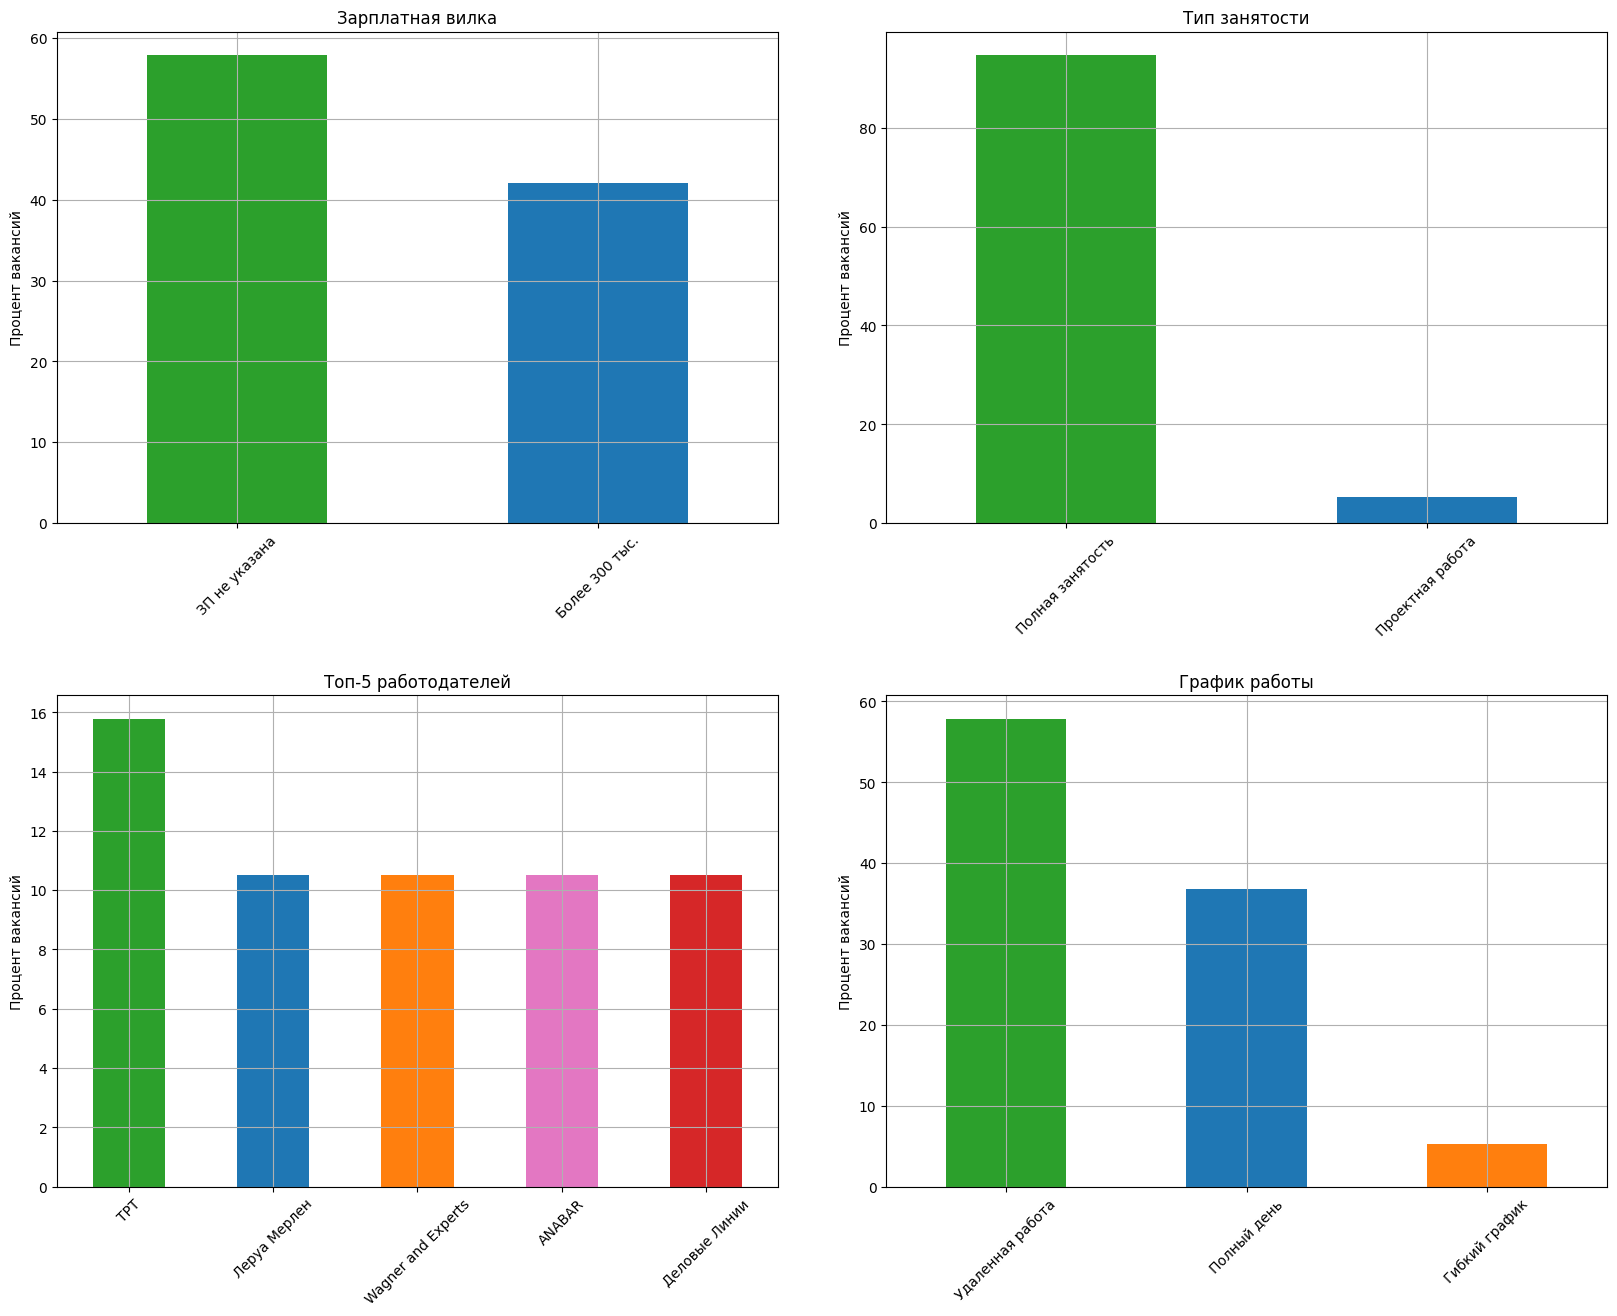

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,employer
ТРТ,3
Леруа Мерлен,2
Wagner and Experts,2
ANABAR,2
Деловые Линии,2


In [67]:
barplots('ДА', da_df, 'senior')

In [68]:
da_df.query('experience == "senior"')['id'].count()

19

Cразу стоит отметить, что выборка ДА senior специалистов является наименьшей и составляет лишь 19 вакансий.

**Зарплатная вилка.** ЗП не указана почти в 60% вакансий, однако весь остаток пришелся на ЗП **более 300 тыс. руб.**

**Топ работодателей.** Большего всего специалисты данного грейда требуется следующим работодателям: **ТРТ** (*16% вакансий*), ANABAR, Деловые Линии, Леруа Мерлен, Wagner and Experts.

**Тип занятости.** Вакансии с **полной занятостью** составляют *около 95%*, оставшаяся доля приходится на проектную работу.

**График работы.** Впервые картина с графиком работы изменилась, основным для Senior специалисты графиком стала **удаленная работа** (чуть *меньше 60%)*, а полный день перешел на второе место (*менее 40% вакансий*)

[Вернуться к оглавлению](#0)

## Динамика количества вакансий <a class="anchor" id="6"></a>

Рассмотрим динамику количества опубликованных вакансий по месяцам.  
Первым делом узнаем минимальную и максимальную дату публикации для каждой таблицы.

In [69]:
print('Мин. дата публикации', ba_df['published_at'].dt.date.min())
print('Макс. дата публикации', ba_df['published_at'].dt.date.max())

Мин. дата публикации 2023-10-02
Макс. дата публикации 2024-01-30


In [70]:
print('Мин. дата публикации', da_df['published_at'].dt.date.min())
print('Макс. дата публикации', da_df['published_at'].dt.date.max())

Мин. дата публикации 2023-09-26
Макс. дата публикации 2024-01-30


Для обеих таблиц период публикации вакансий - с конца сентября/начала октября 2023 года по 30 января 2024 года.

[Вернуться к оглавлению](#0)

### Функция построения графика динамики <a class="anchor" id="6.1"></a>

Подготовим функцию для построения линейного графика динамики и ее таблицы.

In [71]:
def dynamics(df, spec):

    # условие для выбора заголовка графика в зависимости от рассматриваемого направления аналитики 
    if spec == "БА":
        name = 'Ежемесячная динамика доли опубликованных вакансий БА \n от общего количества по грейдам'
    elif spec == "ДА":
        name = 'Ежемесячная динамика доли опубликованных вакансий ДА \n от общего количества по грейдам'
    
    # делаем копию датафрейма
    df_copy = df
    # необходима помесячная динамика, поэтому создадим доп. столбик, указывающий месяц и год публикации
    df_copy['period'] = df_copy['published_at'].dt.to_period('M').dt.to_timestamp()
    
    # создаем сводную таблицу
    vac_dyn = (df_copy
               .pivot_table(
                   index = 'period',
                   columns = 'experience',
                   values = 'id',
                   aggfunc= 'count')
              )

    # меняем количество вакансий на их долю
    vac_dyn = (vac_dyn / vac_dyn.sum() * 100).round()

    # строим линейный график
    (vac_dyn
     .plot(
         grid=True, 
         figsize=(10, 5), 
         style='*-',
         title=name,
         rot=45)
    )


    #plt.legend(["Доля, %"], loc=2)
    plt.xlabel("Месяц публикации")
    plt.ylabel("Доля, %")
    plt.show()
    
    # дополнительно выводим таблицу
    display(vac_dyn.style.format('{:.0f}').background_gradient(cmap='Reds'))

[Вернуться к оглавлению](#0)

### Динамика для БА <a class="anchor" id="6.2"></a>

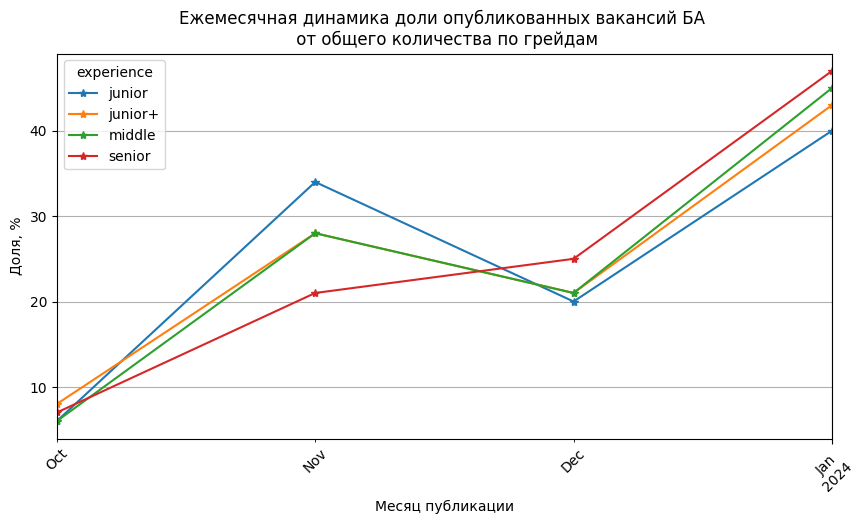

experience,junior,junior+,middle,senior
period,,,,
2023-10-01 00:00:00,6,8,6,7
2023-11-01 00:00:00,34,28,28,21
2023-12-01 00:00:00,20,21,21,25
2024-01-01 00:00:00,40,43,45,47


In [72]:
dynamics(ba_df, "БА")

Общая динамика количества вакансий БА положительна и примерно одинакова для всех грейдов.  
Можно заметить небольшое падение количества вакансий в декабре и резкий скачок в январе, что скорее всего обусловлено тем, что работодатели предпочитают закрыть годовые дела, а искать новых сотрудников уже январе.

[Вернуться к оглавлению](#0)

### Динамика для ДА <a class="anchor" id="6.3"></a>

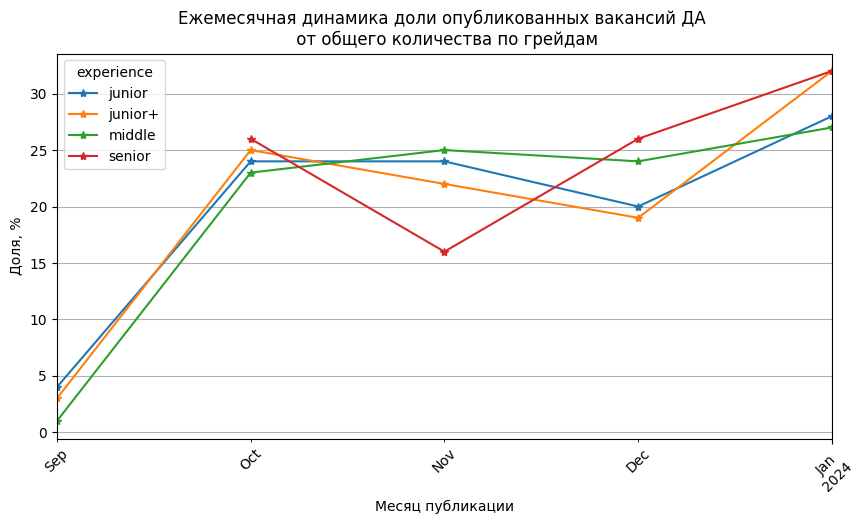

experience,junior,junior+,middle,senior
period,,,,
2023-09-01 00:00:00,4,3,1,nan
2023-10-01 00:00:00,24,25,23,26
2023-11-01 00:00:00,24,22,25,16
2023-12-01 00:00:00,20,19,24,26
2024-01-01 00:00:00,28,32,27,32


In [73]:
dynamics(da_df, "ДА")

Динамика для ДА более спокойная по сравнению с БА, но она также постепенно растет к январю 2024.   
Резкий скачок октябре обусловлен тем, что в выборку попали вакансии только от 26 сентября 2023 года.  
На отрезке октябрь-декабрь динамика стабильна и почти неизменна, стоит только отметить резкое падение доли вакансий senior в ноябре и плавное junior+ специалистов в ноябре-декабре, однако к январю доля вакансий junior+ и senior  специалистов становится наивысшей среди прочих. 

[Вернуться к оглавлению](#0)

## Общие итоговые выводы (отчет) <a class="anchor" id="7"></a>

Выборка составила 786 вакансий для ДА и 4171 для БА.  

Больше всего вакансий для ДА предлагается в СБЕРе, для БА – в Банке ВТБ.  

Наибольшее количество вакансий для ДА (75,5%) и БА (72,5%) предложено в Москве.  

По опыту работы самыми востребованными специалистами являются junior+ (1-3 года опыта) и middle (3-6  лет опыта):  
49,2% и 45,2% вакансий для ДА,  
50,9% и 38,3% для БА.  
Junior (без опыта) специалисты оказались более востребованы в БА, чем в ДА (8,7% вакансий против 3,2%).  

Практически во всех вакансиях обеих специальностей предпочтительным графиком работы является полный день, а типом занятости – «полная».  
Стоит отметить, что с увеличением опыта работы растет доля вакансий, предоставляющих удаленную работу.  

Рост зарплаты, очевидно, тоже напрямую зависит от опыта работы.  
Заметна тенденция увеличения количества вакансий без указания зарплаты с ростом грейда (опыта работы).  

Самые важные soft навыки для БА и ДА примерно одинаковы, однако hard навыки кардинально отличаются.   
Знание SQL – единственный навык, который будет одним из важнейших для обеих специальностей.  
Для БА более присуще моделирование бизнес процессов и управление ими, для ДА больше необходимо программирование и визуализация данных.  

Ежемесячная динамика доли опубликованных вакансий от общего количества по грейдам положительна для обеих специальностей.   Динамика, в целом, имеет постепенный рост (с небольшими падениями) и к концу исследуемого периода достигает своего максимального значения.

Более подробный отчет в презентации по ссылке: https://disk.yandex.ru/i/KjSCchfUiFIo8A
<a class="anchor" id="7.1"></a>  
Или воспользуйтесь QR-кодом ниже (можно нажать на картинку или навести камеру телефона)

<a href="https://disk.yandex.ru/i/KjSCchfUiFIo8A"><img src="https://i.ibb.co/rMKwG4K/qr.png" alt="qr" border="0"></a>

[Вернуться к оглавлению](#0)